In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import HTML
HTML("<style>.container { width:95% !important; }</style>")

In [3]:
from tools2 import  *

In [234]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def y_fmt( y,pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9]
    suffix = ["G", "M", "k", "", "m", "u", "n"]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >= d:
            val = y / float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
                    if str(val).split(".")[1] == "0":
                        return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i])
                tx = "{" + "val:.{signf}f".format(signf=signf) + "} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

    return y




def get_results_alpha(type_algo, mode='CP',window=3480):
   
    cov = []
    mean = []
    std = []
    wklr = []

    pinball = []

    firm = []
    ChristofersenUnconditional = []
    ChristofersenIndependence = []
    ChristofersenConditional = []
    DynamicQuantileTestLower = []
    DynamicQuantileTestUpper = []
    Kupiectest = []

     
    for alpha in tqdm(np.linspace(5, 95, 19)):
         
        
    
        if  (type_algo == 'QCPQuantileRandomForest')|(type_algo == 'QCPQuantileRegression')|(type_algo == 'QCPQuantileGradientBoosting')|(type_algo == 'QCPQuantileKNN'):
            try: 
                df = pd.read_csv(type_algo +'_'+ str(int(alpha)) + '_'+str(window)+'.csv')
            except:
                pass
            #try: 
            #    df = pd.read_csv(type_algo +'_'+ str(int(alpha)) + '_'+str(window)+'.csv')
            #except:
            #    pass
            
         
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['QCP_lower'])
            upper = pd.Series(df['QCP_upper'])
            
        elif  (type_algo == 'QuantileRegression')|(type_algo == 'QuantileGradientBoosting')|(type_algo == 'QuantileKNN')|(type_algo == 'QuantileForestRegression')| (type_algo == 'QuantileLightGBM'):
            df = pd.read_csv(type_algo +'_benchmark_'+ str(int(alpha)) + '.csv')
         
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['benchmark_lower'])
            upper = pd.Series(df['benchmark_upper'])
            
            
        elif type_algo=='MA':
             
            df = pd.read_csv('MvgAvgalpha' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd[-3480:].values)
            predicted = pd.Series(df.m[-3480:].values)
            lower = pd.Series(df.lower_benchmark[-3480:].values)
            upper = pd.Series(df.upper_benchmark[-3480:].values)
            
            
        elif    type_algo=='cudaLSTM':
            df = pd.read_csv( mode+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
           
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df[mode+'_lower'])
            upper = pd.Series(df[mode+'_upper'])
            
            
        elif type_algo=='QLSTM':
             
            df = pd.read_csv('QuantileLstmBoundsBiLSTMCuda_alpha' + str(int(alpha))  + '.csv')
            actual = pd.Series(df.NetPosUsd.values)
            predicted = pd.Series(df.prediction.values)
            lower = pd.Series(df.QR_lower.values)
            upper = pd.Series(df.QR_upper.values)
        else:
            df = pd.read_csv( mode+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
            df2=pd.read_csv('EURUSD_NETPOSUSD_hourly.csv')
           
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df[mode+'_lower'])
            upper = pd.Series(df[mode+'_upper'])
        

        Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

        c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
        

        cov.append(c_)
        mean.append(m_)
        std.append(s_)
        wklr.append(w_)
        pinball.append(p_)
        firm.append(f_)
        ChristofersenUnconditional.append(cu_)
        ChristofersenIndependence.append(ci_)
        ChristofersenConditional.append(cc_)
        DynamicQuantileTestLower.append(dl_)
        DynamicQuantileTestUpper.append(du_)
        Kupiectest.append(k_)

    return cov, mean, std, wklr, pinball, firm, ChristofersenUnconditional, ChristofersenIndependence, ChristofersenConditional, DynamicQuantileTestLower, DynamicQuantileTestUpper, Kupiectest






def plot_errorrate( ):

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(35, 20))
    #for i,x in enumerate(['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','MA','QR','QCPQuantileRandomForest','QCPQuantileRegression','QCPQuantileLightGBM','QuantileRegression','QuantileLightGBM','QuantileGradientBoosting'  ]):
    #    if x not in ['MA','QR','QCPQuantileRandomForest','QCPQuantileRegression','QCPQuantileLightGBM' ,'QuantileRegression','QuantileLightGBM','QuantileGradientBoosting' ]:
     #for i,x in enumerate(['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','GradientBoosting','MA','QLSTM','QCPQuantileGradientBoosting',
      #                    'QCPQuantileRegression', 'QuantileRegression', 'QuantileGradientBoosting'  ]):
       # if x not in ['MA','QR','QCPQuantileRandomForest','QCPQuantileRegression','QCPQuantileLightGBM' ,'QuantileRegression','QuantileLightGBM','QuantileGradientBoosting' ]:
        
    #    for i,x in enumerate([ 'LassoRegression','K-NearestNeighbours', 'GradientBoosting','MA','QLSTM','QCPQuantileGradientBoosting',
     #                     'QCPQuantileRegression', 'QuantileRegression', 'QuantileGradientBoosting' ,'QCPQuantileKNN','QuantileKNN' ,'QuantileForestRegression']):
      #  if x not in ['MA','QLSTM','QCPQuantileRandomForest','QCPQuantileRegression','QuantileRegression', 'QuantileGradientBoosting','QCPQuantileKNN','QuantileKNN','QCPQuantileGradientBoosting','QuantileForestRegression' ]:
        
    
    for i,x in enumerate([ 'LassoRegression','K-NearestNeighbours', 'GradientBoosting','MA','cudaLSTM','QLSTM', 'RandomForest', 
                            'QuantileRegression', 'QuantileGradientBoosting' , 'QuantileKNN' ,'QuantileForestRegression',]):
        #if x not in ['MA','QLSTM','QCPQuantileRandomForest','QCPQuantileRegression','QuantileRegression', 'QuantileGradientBoosting','QCPQuantileKNN','QuantileKNN','QCPQuantileGradientBoosting','QuantileForestRegression' ]:
        
        if x=='MA':
            
            cov, mean, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'CP')
            l=np.linspace(0.05,0.95,19)
            axes[0,0].set_title('Mouving average')
            axes[0,0].plot(l,1-l,'b--')
            t = axes[0,0].twinx()
            t.plot(1-l,mean,'r-',label='mean interval width',linewidth=6)
            axes[0,0].plot(np.nan, '-r',label='mean interval width')
            axes[0,0].plot(1-l,1-np.array(cov),'g-',label='Error Rate',linewidth=6)
             
            #t.legend()
            t.yaxis.set_major_formatter(FuncFormatter(y_fmt))
            axes[0,0].set_xlabel("Confidence level")
            axes[0,0].set_ylabel("Error rate")
            t.set_ylim([0, 2.5*10**7])
            t.set_ylabel("Mean width")
           
            
            
        if x=='K-NearestNeighbours':
            cov, mean, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'CP')
            cov2, mean2, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'NCP')
            l=np.linspace(0.05,0.95,19)
            axes[0,2].set_title(x)
            axes[0,2].plot(l,1-l,'b--')
            t = axes[0,2].twinx()
            t.plot(1-l,mean,'r-',label='CP mean interval width',linewidth=6,alpha=.5)
            t.plot(1-l,mean2,'pink',label='NCP mean interval width',linewidth=6,alpha=.5)
            axes[0,2].plot(np.nan, '-r',label='CP mean interval width')
            axes[0,2].plot(np.nan, 'pink',label='NCP mean interval width')
            axes[0,2].plot(1-l,1-np.array(cov),'g-',label='Error Rate CP',linewidth=6,alpha=.5)
            axes[0,2].plot(1-l,1-np.array(cov2),'lime',label='Error Rate NCP',linewidth=6,alpha=.5)
            
            #t.legend()
            t.yaxis.set_major_formatter(FuncFormatter(y_fmt))
            axes[0,2].set_xlabel("Confidence level")
            axes[0,2].set_ylabel("Error rate")
            t.set_ylim([0, 2.5*10**7])
            t.set_ylabel("Mean width")
        
            
        if x=='QuantileKNN':
            cov, mean, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'CP')
            l=np.linspace(0.05,0.95,19)
             
            axes[0,2].plot(l,1-l,'b--')
            t = axes[0,2].twinx()
            t.plot(1-l,mean,'orange',label='Q mean interval width',linewidth=6)
            axes[0,2].plot(np.nan, 'black',label='Q mean interval width')
            axes[0,2].plot(1-l,1-np.array(cov),'g-',label='Error Rate Q',linewidth=6)
            
            #t.legend()
            t.yaxis.set_major_formatter(FuncFormatter(y_fmt))
            axes[0,2].set_xlabel("Confidence level")
            axes[0,2].set_ylabel("Error rate")
            t.set_ylim([0, 2.5*10**7])
            t.set_ylabel("Mean width")
       
            
            
        if x=='LassoRegression':
            cov, mean, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'CP')
            cov2, mean2, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'NCP')
            l=np.linspace(0.05,0.95,19)
            axes[0,1].set_title('Linear Regression')
            axes[0,1].plot(l,1-l,'b--')
            t = axes[0,1].twinx()
            t.plot(1-l,mean,'r-',label='CP mean interval width',linewidth=6,alpha=.5)
            t.plot(1-l,mean2,'pink',label='NCP mean interval width',linewidth=6,alpha=.5)
            axes[0,1].plot(np.nan, '-r',label='CP mean interval width')
            axes[0,1].plot(np.nan, 'pink',label='NCP mean interval width')
            axes[0,1].plot(1-l,1-np.array(cov),'g-',label='Error Rate CP',linewidth=6,alpha=.5)
            axes[0,1].plot(1-l,1-np.array(cov2),'lime',label='Error Rate NCP',linewidth=6,alpha=.5)
            
            #t.legend()
            t.yaxis.set_major_formatter(FuncFormatter(y_fmt))
            axes[0,1].set_xlabel("Confidence level")
            axes[0,1].set_ylabel("Error rate")
            t.set_ylim([0, 2.5*10**7])
            t.set_ylabel("Mean width")
          
            
        if x=='QuantileRegression':
            cov, mean, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'CP')
            l=np.linspace(0.05,0.95,19)
             
            axes[0,1].plot(l,1-l,'b--')
            t = axes[0,1].twinx()
            t.plot(1-l,mean,'orange',label='Q mean interval width',linewidth=6)
            axes[0,1].plot(np.nan, 'black',label='Q mean interval width')
            axes[0,1].plot(1-l,1-np.array(cov),'g-',label='Error Rate Q',linewidth=6)
            
            #t.legend()
            t.yaxis.set_major_formatter(FuncFormatter(y_fmt))
            axes[0,1].set_xlabel("Confidence level")
            axes[0,1].set_ylabel("Error rate")
            t.set_ylim([0, 2.5*10**7])
            t.set_ylabel("Mean width")
          
            
            
            
        if x=='GradientBoosting':
            cov, mean, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'CP')
            cov2, mean2, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'NCP')
            l=np.linspace(0.05,0.95,19)
            axes[1,0].set_title('Gradient Boosting')
            axes[1,0].plot(l,1-l,'b--')
            t = axes[1,0].twinx()
            t.plot(1-l,mean,'r-',label='CP mean interval width',linewidth=6,alpha=.5)
            t.plot(1-l,mean2,'pink',label='NCP mean interval width',linewidth=6,alpha=.5)
            axes[1,0].plot(np.nan, '-r',label='CP mean interval width')
            axes[1,0].plot(np.nan, 'pink',label='NCP mean interval width')
            axes[1,0].plot(1-l,1-np.array(cov),'g-',label='Error Rate CP',linewidth=6,alpha=.5)
            axes[1,0].plot(1-l,1-np.array(cov2),'lime',label='Error Rate NCP',linewidth=6,alpha=.5)
            
            #t.legend()
            t.yaxis.set_major_formatter(FuncFormatter(y_fmt))
            axes[1,0].set_xlabel("Confidence level")
            axes[1,0].set_ylabel("Error rate")
            t.set_ylim([0, 2.5*10**7])
            t.set_ylabel("Mean width")
           
            
        if x=='QuantileGradientBoosting':
            cov, mean, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'CP')
            l=np.linspace(0.05,0.95,19)
             
            axes[1,0].plot(l,1-l,'b--')
            t = axes[1,0].twinx()
            t.plot(1-l,mean,'orange',label='Q mean interval width',linewidth=6)
            axes[1,0].plot(np.nan, 'black',label='Q mean interval width')
            axes[1,0].plot(1-l,1-np.array(cov),'g-',label='Error Rate Q',linewidth=6)
            
            #t.legend()
            t.yaxis.set_major_formatter(FuncFormatter(y_fmt))
            axes[1,0].set_xlabel("Confidence level")
            axes[1,0].set_ylabel("Error rate")
            t.set_ylim([0, 2.5*10**7])
            t.set_ylabel("Mean width")
           
            
            
        if x=='RandomForest':
            cov, mean, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'CP')
            cov2, mean2, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'NCP')
            l=np.linspace(0.05,0.95,19)
            axes[1,1].set_title('Random Forest')
            axes[1,1].plot(l,1-l,'b--')
            t = axes[1,1].twinx()
            t.plot(1-l,mean,'r-',label='CP mean interval width',linewidth=6,alpha=.5)
            t.plot(1-l,mean2,'pink',label='NCP mean interval width',linewidth=6,alpha=.5)
            axes[1,1].plot(np.nan, '-r',label='CP mean interval width')
            axes[1,1].plot(np.nan, 'pink',label='NCP mean interval width')
            axes[1,1].plot(1-l,1-np.array(cov),'g-',label='Error Rate CP',linewidth=6,alpha=.5)
            axes[1,1].plot(1-l,1-np.array(cov2),'lime',label='Error Rate NCP',linewidth=6,alpha=.5)
            
            #t.legend()
            t.yaxis.set_major_formatter(FuncFormatter(y_fmt))
            axes[1,1].set_xlabel("Confidence level")
            axes[1,1].set_ylabel("Error rate")
            t.set_ylim([0, 2.5*10**7])
            t.set_ylabel("Mean width")
             
            
        if x=='QuantileForestRegression':
            cov, mean, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'CP')
            l=np.linspace(0.05,0.95,19)
             
            axes[1,1].plot(l,1-l,'b--')
            t = axes[1,1].twinx()
            t.plot(1-l,mean,'orange',label='Q mean interval width',linewidth=6)
            axes[1,1].plot(np.nan, 'black',label='Q mean interval width')
            axes[1,1].plot(1-l,1-np.array(cov),'g-',label='Error Rate Q',linewidth=6)
            
            #t.legend()
            t.yaxis.set_major_formatter(FuncFormatter(y_fmt))
            axes[1,1].set_xlabel("Confidence level")
            axes[1,1].set_ylabel("Error rate")
            t.set_ylim([0, 2.5*10**7])
            t.set_ylabel("Mean width")
            
          
            
            
        if x=='cudaLSTM':
            cov, mean, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'CP')
            cov2, mean2, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'NCP')
            l=np.linspace(0.05,0.95,19)
            axes[1,2].set_title('LSTM')
            axes[1,2].plot(l,1-l,'b--')
            t = axes[1,2].twinx()
            t.plot(1-l,mean,'r-',label='CP mean interval width',linewidth=6,alpha=.5)
            t.plot(1-l,mean2,'pink',label='NCP mean interval width',linewidth=6,alpha=.5)
            axes[1,2].plot(np.nan, '-r',label='CP mean interval width')
            axes[1,2].plot(np.nan, 'pink',label='NCP mean interval width')
            axes[1,2].plot(1-l,1-np.array(cov),'g-',label='Error Rate CP',linewidth=6,alpha=.5)
            axes[1,2].plot(1-l,1-np.array(cov2),'lime',label='Error Rate NCP',linewidth=6,alpha=.5)
            
            #t.legend()
            t.yaxis.set_major_formatter(FuncFormatter(y_fmt))
            axes[1,2].set_xlabel("Confidence level")
            axes[1,2].set_ylabel("Error rate")
            t.set_ylim([0, 2.5*10**7])
            t.set_ylabel("Mean width")
            
            
        if x=='QLSTM':
            cov, mean, _, _, _, _, _, _, _, _, _, _=get_results_alpha(x,'CP')
            l=np.linspace(0.05,0.95,19)
            #axes[1,2].set_title('LSTM')
            axes[1,2].plot(l,1-l,'b--')
            t = axes[1,2].twinx()
            t.plot(1-l,mean,'orange',label='Q mean interval width',linewidth=6)
            axes[1,2].plot(np.nan, 'black',label='Q mean interval width')
            axes[1,2].plot(1-l,1-np.array(cov),'g-',label='Error Rate Q',linewidth=6)
            
            #t.legend()
            t.yaxis.set_major_formatter(FuncFormatter(y_fmt))
            axes[1,2].set_xlabel("Confidence level")
            axes[1,2].set_ylabel("Error rate")
            t.set_ylim([0, 2.5*10**7])
            t.set_ylabel("Mean width")
          
            
    axes[0,0].grid(which='both')  
    axes[0,1].grid(which='both') 
    axes[0,2].grid(which='both') 
    axes[1,0].grid(which='both') 
    axes[1,1].grid(which='both') 
    axes[1,2].grid(which='both') 
    handles, labels = [(a + b) for a, b in zip(axes[0,0].get_legend_handles_labels(), axes[1,0].get_legend_handles_labels())]

    plt.legend( handles, labels, loc = 'lower center', bbox_to_anchor = (0,-0.1,1,1),ncol=2,
            bbox_transform = plt.gcf().transFigure )
   
    plt.tight_layout()


    fig.subplots_adjust(top=0.88)
    fig.suptitle('Calibration and mean interval width ', fontsize=24)
    plt.savefig( 'cover_vs_mean.png')
    #plt.grid()

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 45.79it/s]


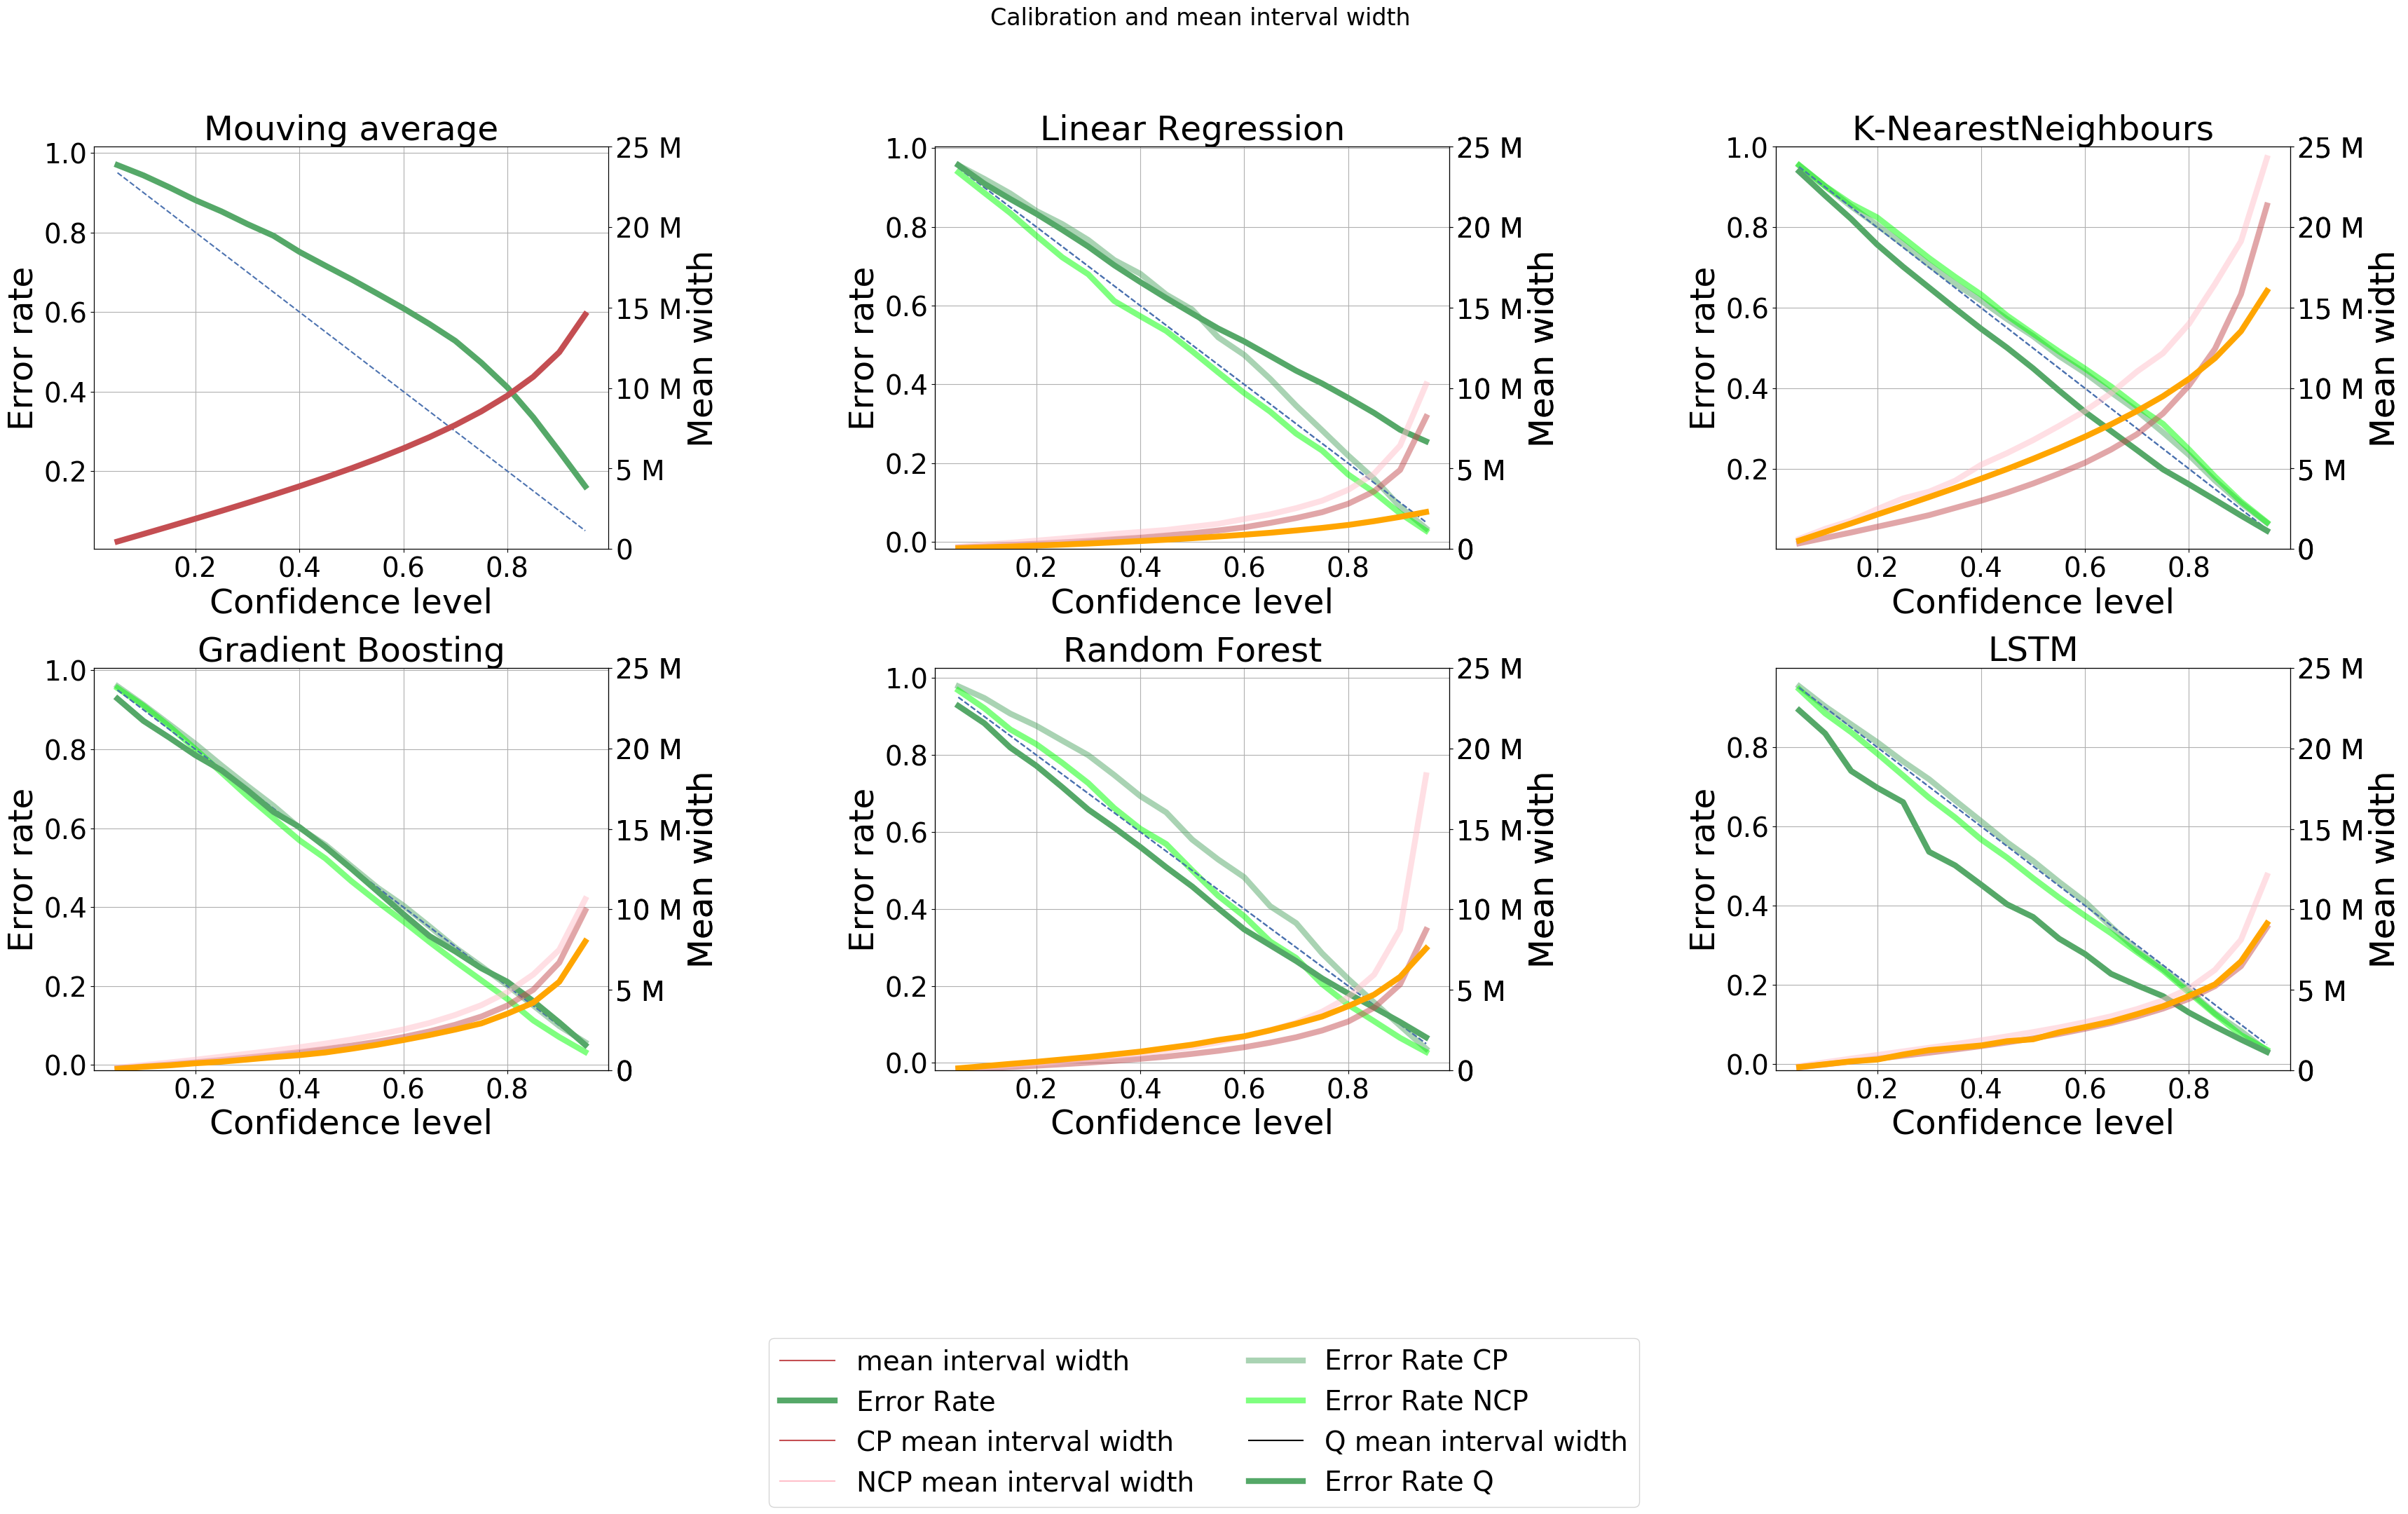

In [235]:

SMALL_SIZE = 28
MEDIUM_SIZE = 35
BIGGER_SIZE = 44
#plt.rcParams['axes.grid'] = True

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=35)   # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plot_errorrate()

In [38]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


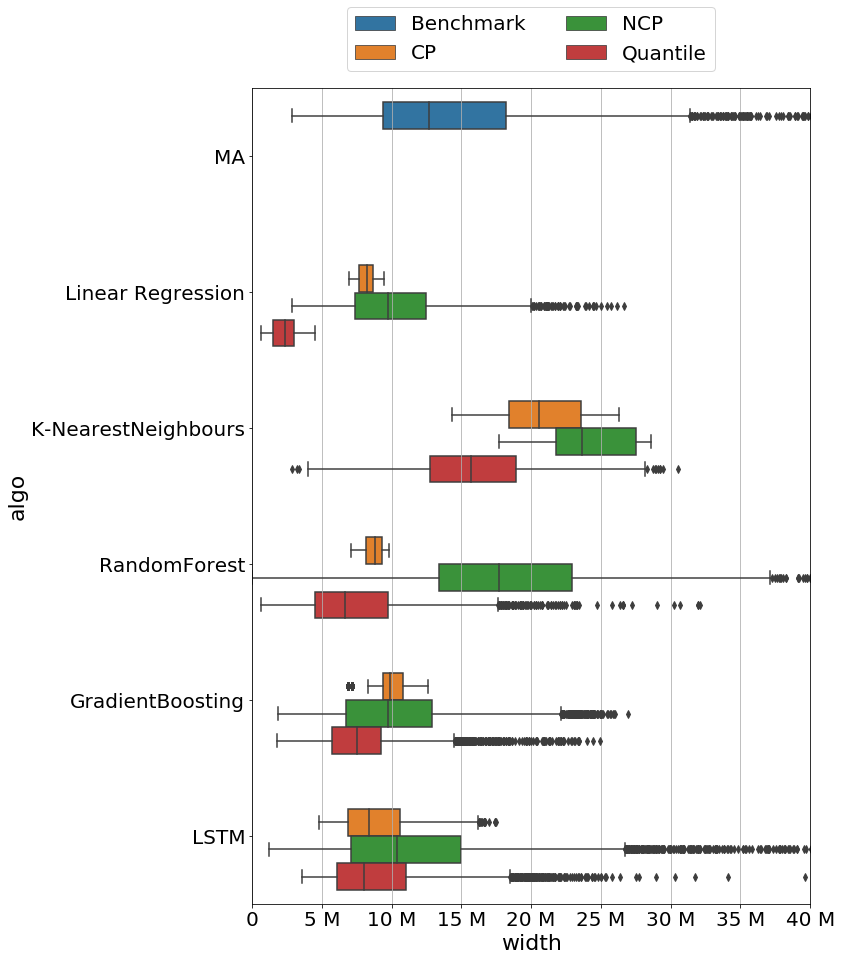

In [88]:
def get_distributions(type_algo,alpha_,  window=3480):
    print(type_algo)
    cov = []
    mean = []
    std = []
    wklr = []

    pinball = []

    firm = []
    ChristofersenUnconditional = []
    ChristofersenIndependence = []
    ChristofersenConditional = []
    DynamicQuantileTestLower = []
    DynamicQuantileTestUpper = []
    Kupiectest = []
    
    out=pd.DataFrame() 
    for alpha in [alpha_]:
        
        if type_algo =='LassoRegression':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            out_dict['width']=upper-lower
            out_dict['algo']= 'Linear Regression'
            outdf=pd.DataFrame(data=out_dict)
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            out_dict2['width']=upper-lower
            out_dict2['algo']= 'Linear Regression'
            outdf2=pd.DataFrame(data=out_dict2)
            
           
            df = pd.read_csv('QuantileRegression_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd.values)
            predicted = pd.Series(df.prediction.values)
            lower = pd.Series(df.benchmark_lower.values)
            upper = pd.Series(df.benchmark_upper.values)
            out_dict3={}
            out_dict3['width']=upper-lower
            out_dict3['algo']='Linear Regression'
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3)
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
        elif type_algo =='K-NearestNeighbours':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            out_dict['width']=upper-lower
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict)
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            out_dict2['width']=upper-lower
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2)
            
           
            df = pd.read_csv('QuantileKNN_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd.values)
            predicted = pd.Series(df.prediction.values)
            lower = pd.Series(df.benchmark_lower.values)
            upper = pd.Series(df.benchmark_upper.values)
            out_dict3={}
            out_dict3['width']=upper-lower
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3)
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
            
        elif type_algo =='RandomForest':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            out_dict['width']=upper-lower
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict)
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            out_dict2['width']=upper-lower
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2)
            
           
            df = pd.read_csv('QuantileForestRegression_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd.values)
            predicted = pd.Series(df.prediction.values)
            lower = pd.Series(df.benchmark_lower.values)
            upper = pd.Series(df.benchmark_upper.values)
            out_dict3={}
            out_dict3['width']=upper-lower
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3)
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
            
        elif type_algo =='GradientBoosting':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            out_dict['width']=upper-lower
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict)
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            out_dict2['width']=upper-lower
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2)
            
           
            df = pd.read_csv('QuantileGradientBoosting_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd.values)
            predicted = pd.Series(df.prediction.values)
            lower = pd.Series(df.benchmark_lower.values)
            upper = pd.Series(df.benchmark_upper.values)
            out_dict3={}
            out_dict3['width']=upper-lower
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3)
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
         
        elif (type_algo=='MA') :
             
            df = pd.read_csv('MvgAvgalpha' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd[-3480:].values)
            predicted = pd.Series(df.m[-3480:].values)
            lower = pd.Series(df.lower_benchmark[-3480:].values)
            upper = pd.Series(df.upper_benchmark[-3480:].values)
            out_dict={}
            out_dict['width']=upper-lower
            out_dict['algo']= type_algo
            out_dict['type']= 'Benchmark'
            
            outdf=pd.DataFrame(data=out_dict)
        elif type_algo=='QR':
            
            df = pd.read_csv( 'CP'+'_'+'cudaLSTM'+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            out_dict['width']=upper-lower
            out_dict['algo']= 'LSTM'
            outdf=pd.DataFrame(data=out_dict)
            
            df = pd.read_csv( 'NCP'+'_'+'cudaLSTM'+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            out_dict2['width']=upper-lower
            out_dict2['algo']= 'LSTM'
            outdf2=pd.DataFrame(data=out_dict2)
            
            
            
             
            df = pd.read_csv('QuantileLstmBoundsBiLSTMCuda_alpha' + str(int(alpha))  + '.csv')
            actual = pd.Series(df.NetPosUsd.values)
            predicted = pd.Series(df.prediction.values)
            lower = pd.Series(df.QR_lower.values)
            upper = pd.Series(df.QR_upper.values)
            out_dict={}
            out_dict['width']=upper-lower
            out_dict['algo']= 'LSTM'
            out_dict['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict)
            
            outdf=pd.concat([outdf,outdf2,outdf3])
        
         

    return outdf
import seaborn as sns
def distplot( ):
    out=pd.DataFrame(columns=['width','algo'])
    algos=['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','MA','QR','OLDXGB']
    algos=['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','MA','QR','QCPQuantileRandomForest','QCPQuantileRegression','QCPQuantileLightGBM' ]
    algos=['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','GradientBoosting','MA','QR','QCPQuantileGradientBoosting',
                          'QCPQuantileRegression', 'QuantileRegression', 'QuantileGradientBoosting'  ]
    
    algos=[ 'MA','LassoRegression','K-NearestNeighbours','RandomForest','GradientBoosting','QR'  ]
    
    
    
    for i,x in enumerate(algos):
        df=get_distributions(x,5)
        out=pd.concat([out,df])
    fig,ax=plt.subplots(figsize=(10,15))        
    ax = sns.boxplot(x="width", y="algo",hue='type', data=out)
    ax.xaxis.set_major_formatter(FuncFormatter(y_fmt))
    ax.set_xlim([0, 40000000])
    ax.xaxis.grid(True)
    #handles, labels = ax.get_legend_handles_labels()
     
    #lgd=plt.figlegend( handles, labels,loc='upper center',  bbox_to_anchor=(0.5, .075), ncol=6, labelspacing=0.1,prop={'size':20} , fancybox=True, shadow=True)
    
    #plt.tight_layout()
   # plt.savefig( 'distributions.png', bbox_extra_artists=(lgd,), bbox_inches='tight')


    handles, labels = ax.get_legend_handles_labels()

    # When creating the legend, only use the first two elements
    # to effectively remove the last two.
    l = plt.legend(handles , labels , bbox_to_anchor=(.17, 1.1), ncol=2,loc=2, borderaxespad=0.)
    plt.savefig( 'distributions.png',bbox_inches="tight" )
    plt.show()

 

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24
#plt.rcParams['axes.grid'] = True

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title    

distplot()

In [69]:
 def help_winkler(y,l,u,alpha):
    if ((l<=y)&(y<=u)):
        return u-l
    elif (y<l):
        return u-l +2/alpha*(l-y)
    else:
        return u-l +2/alpha*(y-u)
        
def winkler(y_test,pred_ql,pred_qh,alpha_cp):
    bounds_df = pd.DataFrame()

    # Using % confidence bounds
    bounds_df['lower_bound'] = pred_ql
    bounds_df['real_value'] = y_test
    bounds_df['upper_bound'] = pred_qh
    bounds_df['alpha']=alpha_cp
    
    bounds_df['winkler']=np.vectorize(help_winkler)(bounds_df['real_value'],bounds_df['lower_bound'], bounds_df['upper_bound'], bounds_df['alpha'])
    #plt.hist(np.log(bounds_df['winkler'][bounds_df['winkler']>0]) ,bins=25,label='Winkler',alpha=.5);
    #print("winklerwinkler_score points contained within " + str(1 - alpha_cp)+ "%  is the mean winklerwinkler_score:", bounds_df['winkler'])
    return bounds_df['winkler']

    


def get_distributions_winkler(type_algo,alpha_,  window=3480):
    print(type_algo)
    cov = []
    mean = []
    std = []
    wklr = []

    pinball = []

    firm = []
    ChristofersenUnconditional = []
    ChristofersenIndependence = []
    ChristofersenConditional = []
    DynamicQuantileTestLower = []
    DynamicQuantileTestUpper = []
    Kupiectest = []
    
    out=pd.DataFrame() 
    for alpha in [alpha_]:
        
        if type_algo =='LassoRegression':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            out_dict['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            out_dict2['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileRegression_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            out_dict3['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
        elif type_algo =='K-NearestNeighbours':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            out_dict['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            out_dict2['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileKNN_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            out_dict3['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
            
        elif type_algo =='RandomForest':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            out_dict['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            out_dict2['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileForestRegression_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            out_dict3['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
            
        elif type_algo =='GradientBoosting':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            out_dict['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            out_dict2['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileGradientBoosting_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            out_dict3['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
         
        elif (type_algo=='MA') :
             
            df = pd.read_csv('MvgAvgalpha' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd[-3480:])
            predicted = pd.Series(df.m[-3480:])
            lower = pd.Series(df.lower_benchmark[-3480:])
            upper = pd.Series(df.upper_benchmark[-3480:])
            out_dict={}
            out_dict['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict['algo']= type_algo
            out_dict['type']= 'Benchmarks'
            
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            
            
        elif type_algo=='QR':
            
            df = pd.read_csv( 'CP'+'_'+'cudaLSTM'+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd.values)
            predicted = pd.Series(df.prediction.values)
            lower = pd.Series(df['CP_lower'].values)
            upper = pd.Series(df['CP_upper'].values)
            out_dict={}
            out_dict['type']= 'CP'
            out_dict['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict['algo']= 'LSTM'
            outdf=pd.DataFrame(data=out_dict,index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+'cudaLSTM'+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            out_dict2['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict2['algo']= 'LSTM'
            outdf2=pd.DataFrame(data=out_dict2,index=[0])
            
            
            
             
            df = pd.read_csv('QuantileLstmBoundsBiLSTMCuda_alpha' + str(int(alpha))  + '.csv')
            actual = pd.Series(df.NetPosUsd.values)
            predicted = pd.Series(df.prediction.values)
            lower = pd.Series(df.QR_lower.values)
            upper = pd.Series(df.QR_upper.values)
            out_dict={}
            out_dict['winker_score']=winkler(actual,lower,upper,alpha/100).mean()
            out_dict['algo']= 'LSTM'
            out_dict['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict,index=[0])
            
            outdf=pd.concat([outdf,outdf2,outdf3])    
            
            
            
        
        
         

    return outdf
import seaborn as sns
def distplot(alpha ):
    out=pd.DataFrame(columns=['winker_score','algo'])
    algos=['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','MA','QR','OLDXGB']
    algos=['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','MA','QR','QCPQuantileRandomForest','QCPQuantileRegression','QCPQuantileLightGBM' ]
    algos=['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','GradientBoosting','MA','QR','QCPQuantileGradientBoosting',
                          'QCPQuantileRegression', 'QuantileRegression', 'QuantileGradientBoosting'  ]
    
    algos=[ 'MA','LassoRegression','K-NearestNeighbours','RandomForest','GradientBoosting','QR'  ]
    
    
    
    for i,x in enumerate(algos):
        df=get_distributions_winkler(x,alpha)
        out=pd.concat([out,df])
    out['alpha']    =alpha
    return out

o=distplot(10)

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


In [70]:
out=pd.DataFrame()
for x in tqdm(np.linspace(5,95,19)):
    add=distplot(x)
    out=pd.concat([out,add])

  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest


  5%|████▎                                                                              | 1/19 [00:00<00:05,  3.08it/s]

GradientBoosting
QR
MA
LassoRegression


 11%|████████▋                                                                          | 2/19 [00:00<00:05,  3.21it/s]

K-NearestNeighbours
RandomForest
GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 16%|█████████████                                                                      | 3/19 [00:00<00:04,  3.30it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest


 21%|█████████████████▍                                                                 | 4/19 [00:01<00:04,  3.31it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 26%|█████████████████████▊                                                             | 5/19 [00:01<00:04,  3.24it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting

 32%|██████████████████████████▏                                                        | 6/19 [00:01<00:04,  3.23it/s]


QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 37%|██████████████████████████████▌                                                    | 7/19 [00:02<00:03,  3.34it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 42%|██████████████████████████████████▉                                                | 8/19 [00:02<00:03,  3.40it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest


 47%|███████████████████████████████████████▎                                           | 9/19 [00:02<00:02,  3.38it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 53%|███████████████████████████████████████████▏                                      | 10/19 [00:02<00:02,  3.36it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 58%|███████████████████████████████████████████████▍                                  | 11/19 [00:03<00:02,  3.43it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest

 63%|███████████████████████████████████████████████████▊                              | 12/19 [00:03<00:02,  3.46it/s]


GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 68%|████████████████████████████████████████████████████████                          | 13/19 [00:03<00:01,  3.45it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 74%|████████████████████████████████████████████████████████████▍                     | 14/19 [00:04<00:01,  3.49it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest


 79%|████████████████████████████████████████████████████████████████▋                 | 15/19 [00:04<00:01,  3.53it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours


 84%|█████████████████████████████████████████████████████████████████████             | 16/19 [00:04<00:00,  3.59it/s]

RandomForest
GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 89%|█████████████████████████████████████████████████████████████████████████▎        | 17/19 [00:04<00:00,  3.37it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 18/19 [00:05<00:00,  3.29it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:05<00:00,  3.37it/s]


In [89]:


def tick_lossr(actual,lower,upper,alpha):
    def hit_series_lower(actual,lower):
        return ( (actual < lower ))* 1
    def hit_series_upper(actual ,upper):
        return ((actual > upper)  )* 1

    lossl = (alpha/2 - hit_series_lower(actual,lower)) * (actual - lower)
    lossu = (alpha/2 - hit_series_upper(actual,upper)) * (-actual + upper)
    loss=(lossl+lossu)/2

    return loss
def help_winkler(y,l,u,alpha):
    if ((l<=y)&(y<=u)):
        return u-l
    elif (y<l):
        return u-l +2/alpha*(l-y)
    else:
        return u-l +2/alpha*(y-u)
        
def winkler(y_test,pred_ql,pred_qh,alpha_cp):
    bounds_df = pd.DataFrame()

    # Using % confidence bounds
    bounds_df['lower_bound'] = pred_ql
    bounds_df['real_value'] = y_test
    bounds_df['upper_bound'] = pred_qh
    bounds_df['alpha']=alpha_cp
    
    bounds_df['winkler']=np.vectorize(help_winkler)(bounds_df['real_value'],bounds_df['lower_bound'], bounds_df['upper_bound'], bounds_df['alpha'])
    #plt.hist(np.log(bounds_df['winkler'][bounds_df['winkler']>0]) ,bins=25,label='Winkler',alpha=.5);
    #print("winklerwinkler_score points contained within " + str(1 - alpha_cp)+ "%  is the mean winklerwinkler_score:", bounds_df['winkler'])
    return bounds_df['winkler']

    


def get_distributions_pinball(type_algo,alpha_,  window=3480):
    print(type_algo)
    cov = []
    mean = []
    std = []
    wklr = []

    pinball = []

    firm = []
    ChristofersenUnconditional = []
    ChristofersenIndependence = []
    ChristofersenConditional = []
    DynamicQuantileTestLower = []
    DynamicQuantileTestUpper = []
    Kupiectest = []
    
    out=pd.DataFrame() 
    for alpha in [alpha_]:
        
        if type_algo =='LassoRegression':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            out_dict['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            out_dict2['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileRegression_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            out_dict3['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
        elif type_algo =='K-NearestNeighbours':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            out_dict['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            out_dict2['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileKNN_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            out_dict3['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
            
        elif type_algo =='RandomForest':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            out_dict['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            out_dict2['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileForestRegression_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            out_dict3['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
            
        elif type_algo =='GradientBoosting':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            out_dict['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            out_dict2['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileGradientBoosting_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            out_dict3['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
         
        elif (type_algo=='MA') :
             
            df = pd.read_csv('MvgAvgalpha' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd[-3480:])
            predicted = pd.Series(df.m[-3480:])
            lower = pd.Series(df.lower_benchmark[-3480:])
            upper = pd.Series(df.upper_benchmark[-3480:])
            out_dict={}
            out_dict['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict['algo']= type_algo
            out_dict['type']= 'Benchmarks'
            
            outdf=pd.DataFrame(data=out_dict, index=[0])
        elif type_algo=='QR':
             
            df = pd.read_csv( 'CP'+'_'+'cudaLSTM'+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd.values)
            predicted = pd.Series(df.prediction.values)
            lower = pd.Series(df['CP_lower'].values)
            upper = pd.Series(df['CP_upper'].values)
            out_dict={}
            out_dict['type']= 'CP'
            out_dict['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict['algo']= 'LSTM'
            outdf=pd.DataFrame(data=out_dict,index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+'cudaLSTM'+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv').fillna(0)
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            out_dict2['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict2['algo']= 'LSTM'
            outdf2=pd.DataFrame(data=out_dict2,index=[0])
            
            
            
             
            df = pd.read_csv('QuantileLstmBoundsBiLSTMCuda_alpha' + str(int(alpha))  + '.csv')
            actual = pd.Series(df.NetPosUsd.values)
            predicted = pd.Series(df.prediction.values)
            lower = pd.Series(df.QR_lower.values)
            upper = pd.Series(df.QR_upper.values)
            out_dict={}
            out_dict['winker_score']=tick_lossr(actual,lower,upper,alpha/100).mean()
            out_dict['algo']= 'LSTM'
            out_dict['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict,index=[0])
            
            outdf=pd.concat([outdf,outdf2,outdf3])    
        
         

    return outdf
import seaborn as sns
def distplot(alpha ):
    out=pd.DataFrame(columns=['winker_score','algo'])
    algos=['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','MA','QR','OLDXGB']
    algos=['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','MA','QR','QCPQuantileRandomForest','QCPQuantileRegression','QCPQuantileLightGBM' ]
    algos=['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','GradientBoosting','MA','QR','QCPQuantileGradientBoosting',
                          'QCPQuantileRegression', 'QuantileRegression', 'QuantileGradientBoosting'  ]
    
    algos=[ 'MA','LassoRegression','K-NearestNeighbours','RandomForest','GradientBoosting','QR'  ]
    
    
    
    for i,x in enumerate(algos):
        df=get_distributions_pinball(x,alpha)
        out=pd.concat([out,df])
    out['alpha']    =alpha
    return out

o=distplot(10)

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


In [90]:
out2=pd.DataFrame()
for x in tqdm(np.linspace(5,95,19)):
    add=distplot(x)
    out2=pd.concat([out2,add])

  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


  5%|████▎                                                                              | 1/19 [00:00<00:03,  4.52it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 11%|████████▋                                                                          | 2/19 [00:00<00:03,  4.51it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 16%|█████████████                                                                      | 3/19 [00:00<00:03,  4.50it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 21%|█████████████████▍                                                                 | 4/19 [00:00<00:03,  4.34it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 26%|█████████████████████▊                                                             | 5/19 [00:01<00:03,  4.32it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 32%|██████████████████████████▏                                                        | 6/19 [00:01<00:02,  4.36it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 37%|██████████████████████████████▌                                                    | 7/19 [00:01<00:02,  4.40it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 42%|██████████████████████████████████▉                                                | 8/19 [00:01<00:02,  4.34it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest


 47%|███████████████████████████████████████▎                                           | 9/19 [00:02<00:02,  4.31it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest


 53%|███████████████████████████████████████████▏                                      | 10/19 [00:02<00:02,  4.37it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest


 58%|███████████████████████████████████████████████▍                                  | 11/19 [00:02<00:01,  4.43it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest


 63%|███████████████████████████████████████████████████▊                              | 12/19 [00:02<00:01,  4.38it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest

 68%|████████████████████████████████████████████████████████                          | 13/19 [00:02<00:01,  4.32it/s]


GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours

 74%|████████████████████████████████████████████████████████████▍                     | 14/19 [00:03<00:01,  4.34it/s]


RandomForest
GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 79%|████████████████████████████████████████████████████████████████▋                 | 15/19 [00:03<00:00,  4.40it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR

 84%|█████████████████████████████████████████████████████████████████████             | 16/19 [00:03<00:00,  4.41it/s]


MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting

 89%|█████████████████████████████████████████████████████████████████████████▎        | 17/19 [00:03<00:00,  4.38it/s]


QR
MA
LassoRegression
K-NearestNeighbours


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 18/19 [00:04<00:00,  4.37it/s]

RandomForest
GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:04<00:00,  4.38it/s]

RandomForest
GradientBoosting
QR


GradientBoosting
GradientBoosting
GradientBoosting
K-NearestNeighbours
K-NearestNeighbours
K-NearestNeighbours
LSTM
LSTM
LSTM
LassoRegression
LassoRegression
LassoRegression
MA
RandomForest
RandomForest
RandomForest


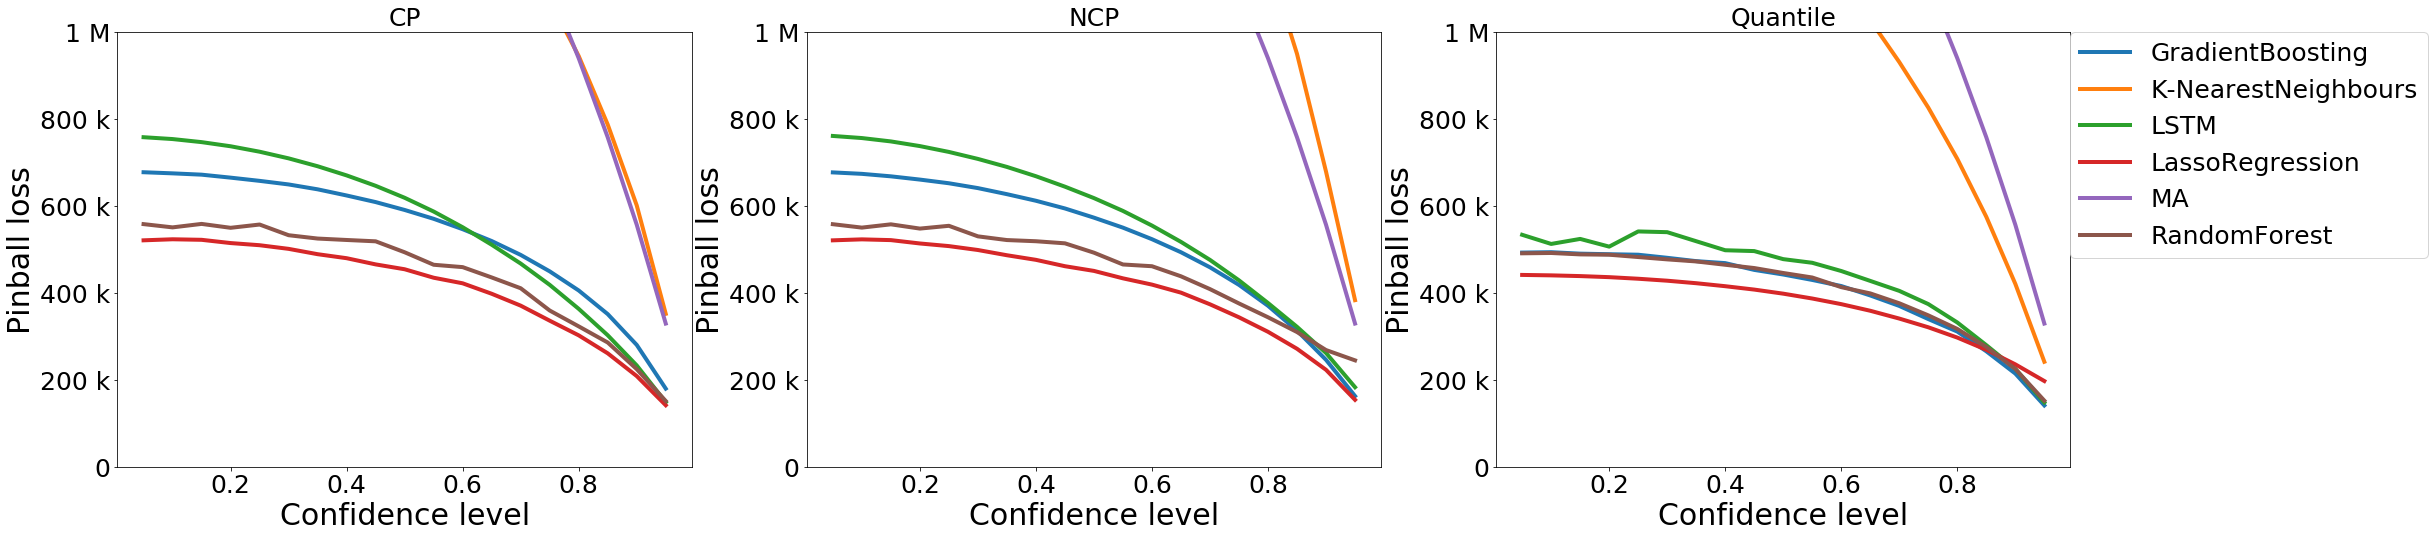

In [91]:
SMALL_SIZE = 25
MEDIUM_SIZE = 30
BIGGER_SIZE = 30
#plt.rcParams['axes.grid'] = True

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(35, 8))
for i , g in out2.groupby(['algo','type']):
    a,t=i
    print(a)
    j=0
    if t=='CP': j=0
    if t=='NCP': j=1
    if t=='Quantile': j=2
    if a=='MA': 
        axes[0].plot(1-g.alpha/100,g.winker_score,label=a,linewidth=4)
        axes[1].plot(1-g.alpha/100,g.winker_score,label=a,linewidth=4)
        axes[2].plot(1-g.alpha/100,g.winker_score,label=a,linewidth=4)
    else:
    
        axes[j].plot(1-g.alpha/100,g.winker_score,label=a,linewidth=4)
        axes[j].set_title(t)

axes[0].yaxis.set_major_formatter(FuncFormatter(y_fmt))
axes[1].yaxis.set_major_formatter(FuncFormatter(y_fmt))
axes[2].yaxis.set_major_formatter(FuncFormatter(y_fmt))
 
axes[0].set_ylim([0, 10**6])
axes[1].set_ylim([0, 10**6])
axes[2].set_ylim([0, 10**6])

axes[0].set_xlabel("Confidence level")
axes[0].set_ylabel("Pinball loss")
axes[1].set_xlabel("Confidence level")
axes[1].set_ylabel("Pinball loss")
axes[2].set_xlabel("Confidence level")
axes[2].set_ylabel("Pinball loss")

plt.legend( bbox_to_anchor=(1,1), ncol=1,loc=2, borderaxespad=0.)
plt.savefig( 'pinball.png',bbox_inches="tight" ) 



In [60]:
out2

,winker_score,algo,type,alpha
0,NaN,MA,Benchmarks,5.0
0,116773.873030,LassoRegression,CP,5.0
0,148087.570690,LassoRegression,NCP,5.0
0,36491.855599,LassoRegression,Quantile,5.0
0,221810.516061,K-NearestNeighbours,CP,5.0
...,...,...,...,...
0,712267.140723,GradientBoosting,NCP,95.0
0,578632.105473,GradientBoosting,Quantile,95.0
0,739513.653078,LSTM,CP,95.0
0,NaN,LSTM,NCP,95.0


GradientBoosting
GradientBoosting
GradientBoosting
K-NearestNeighbours
K-NearestNeighbours
K-NearestNeighbours
LSTM
LSTM
LSTM
LassoRegression
LassoRegression
LassoRegression
MA
RandomForest
RandomForest
RandomForest


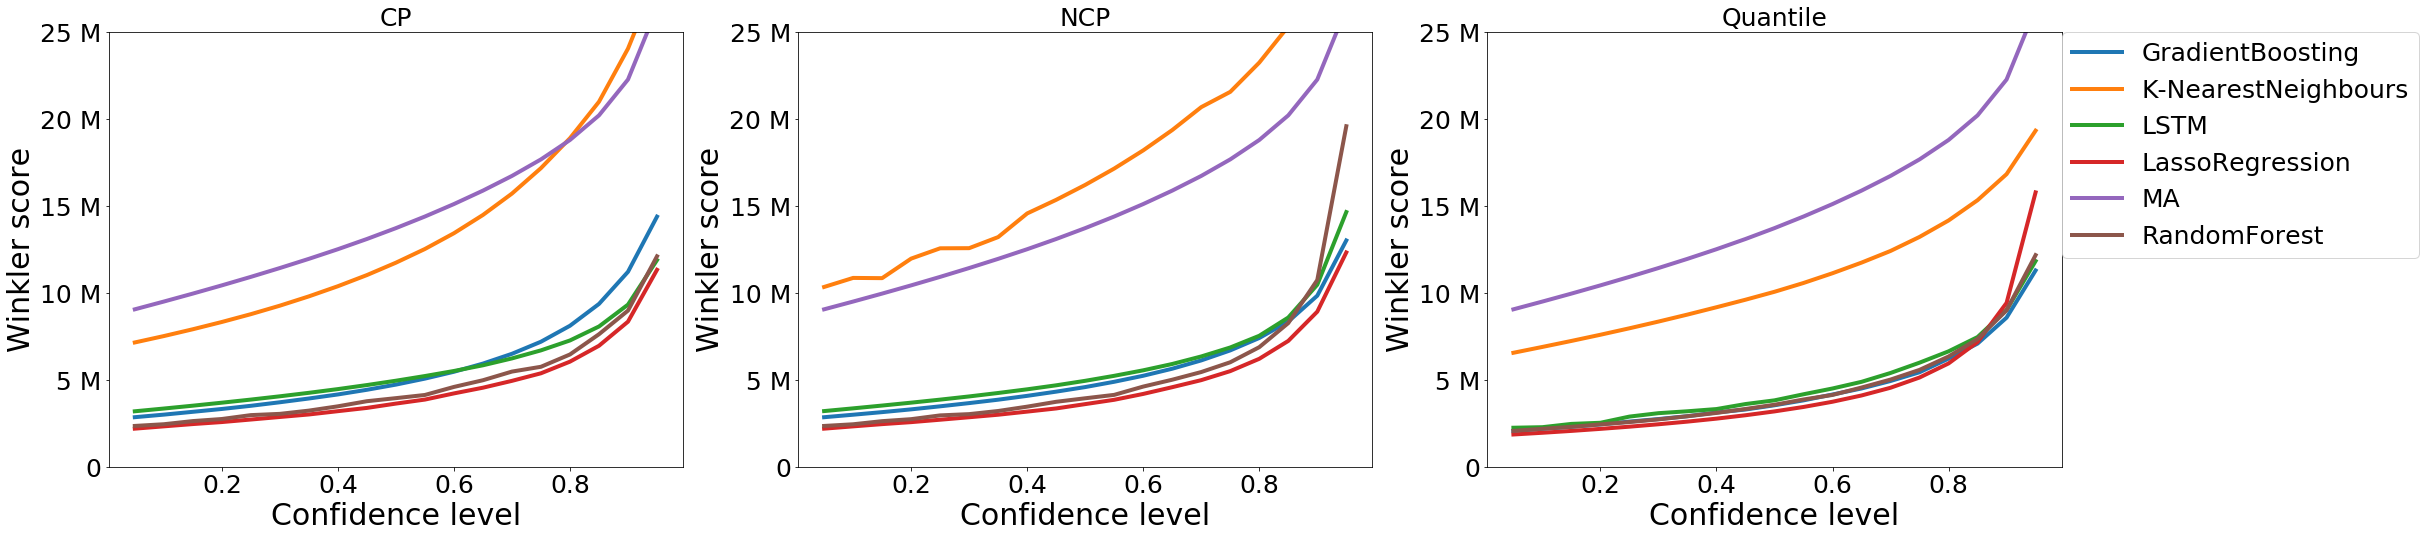

In [72]:
 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(35, 8))
for i , g in out.groupby(['algo','type']):
    
    a,t=i
    if 1:
        print(a)
        if t=='CP': j=0
        if t=='NCP': j=1
        if t=='Quantile': j=2
        if a=='MA': 
            axes[0].plot(1-g.alpha/100,g.winker_score,label=a,linewidth=4)
            axes[1].plot(1-g.alpha/100,g.winker_score,label=a,linewidth=4)
            axes[2].plot(1-g.alpha/100,g.winker_score,label=a,linewidth=4)
        else:

            axes[j].plot(1-g.alpha/100,g.winker_score,label=a,linewidth=4)
            axes[j].set_title(t)

axes[0].yaxis.set_major_formatter(FuncFormatter(y_fmt))
axes[1].yaxis.set_major_formatter(FuncFormatter(y_fmt))
axes[2].yaxis.set_major_formatter(FuncFormatter(y_fmt))
 
axes[0].set_ylim([0, 2.5*10**7])
axes[1].set_ylim([0, 2.5*10**7])
axes[2].set_ylim([0, 2.5*10**7])

axes[0].set_xlabel("Confidence level")
axes[0].set_ylabel("Winkler score")
axes[1].set_xlabel("Confidence level")
axes[1].set_ylabel("Winkler score")
axes[2].set_xlabel("Confidence level")
axes[2].set_ylabel("Winkler score")
    
 

plt.legend( bbox_to_anchor=(1,1), ncol=1,loc=2, borderaxespad=0.)
plt.savefig( 'winkler.png',bbox_inches="tight" ) 




In [48]:
out

,winker_score,algo,type,alpha
0,2.635031e+07,MA,Benchmarks,5.0
0,1.132478e+07,LassoRegression,CP,5.0
0,1.232259e+07,LassoRegression,NCP,5.0
0,1.577593e+07,LassoRegression,Quantile,5.0
0,2.813893e+07,K-NearestNeighbours,CP,5.0
...,...,...,...,...
0,2.850371e+06,GradientBoosting,NCP,95.0
0,2.060294e+06,GradientBoosting,Quantile,95.0
0,3.191110e+06,LSTM,CP,95.0
0,NaN,LSTM,NCP,95.0


In [73]:


def tick_lossr(actual,lower,upper,alpha):
    def hit_series_lower(actual,lower):
        return ( (actual < lower ))* 1
    def hit_series_upper(actual ,upper):
        return ((actual > upper)  )* 1

    lossl = (alpha/2 - hit_series_lower(actual,lower)) * (actual - lower)
    lossu = (alpha/2 - hit_series_upper(actual,upper)) * (-actual + upper)
    loss=(lossl+lossu)/2

    return loss.mean()
def help_winkler(y,l,u,alpha):
    if ((l<=y)&(y<=u)):
        return u-l
    elif (y<l):
        return u-l +2/alpha*(l-y)
    else:
        return u-l +2/alpha*(y-u)
        
def winkler(y_test,pred_ql,pred_qh,alpha_cp):
    bounds_df = pd.DataFrame()

    # Using % confidence bounds
    bounds_df['lower_bound'] = pred_ql
    bounds_df['real_value'] = y_test
    bounds_df['upper_bound'] = pred_qh
    bounds_df['alpha']=alpha_cp
    
    bounds_df['winkler']=np.vectorize(help_winkler)(bounds_df['real_value'],bounds_df['lower_bound'], bounds_df['upper_bound'], bounds_df['alpha'])
    #plt.hist(np.log(bounds_df['winkler'][bounds_df['winkler']>0]) ,bins=25,label='Winkler',alpha=.5);
    #print("winklerwinkler_score points contained within " + str(1 - alpha_cp)+ "%  is the mean winklerwinkler_score:", bounds_df['winkler'].mean())
    return bounds_df['winkler']

    


def get_distributions_pinball(type_algo,alpha_,  window=3480):
    print(type_algo)
    cov = []
    mean = []
    std = []
    wklr = []

    pinball = []

    firm = []
    ChristofersenUnconditional = []
    ChristofersenIndependence = []
    ChristofersenConditional = []
    DynamicQuantileTestLower = []
    DynamicQuantileTestUpper = []
    Kupiectest = []
    
    out=pd.DataFrame() 
    for alpha in [alpha_]:
        
        if type_algo =='LassoRegression':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict['CU']= cu_
            out_dict['CI']= ci_
            out_dict['CC']= cc_
            out_dict['DQTL']= dl_
            out_dict['DQTU']= du_
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict2['CU']= cu_
            out_dict2['CI']= ci_
            out_dict2['CC']= cc_
            out_dict2['DQTL']= dl_
            out_dict2['DQTU']= du_
            
            
            
             
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileRegression_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict3['CU']= cu_
            out_dict3['CI']= ci_
            out_dict3['CC']= cc_
            out_dict3['DQTL']= dl_
            out_dict3['DQTU']= du_
            
             
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
        elif type_algo =='K-NearestNeighbours':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict['CU']= cu_
            out_dict['CI']= ci_
            out_dict['CC']= cc_
            out_dict['DQTL']= dl_
            out_dict['DQTU']= du_
             
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict2['CU']= cu_
            out_dict2['CI']= ci_
            out_dict2['CC']= cc_
            out_dict2['DQTL']= dl_
            out_dict2['DQTU']= du_
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileKNN_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict3['CU']= cu_
            out_dict3['CI']= ci_
            out_dict3['CC']= cc_
            out_dict3['DQTL']= dl_
            out_dict3['DQTU']= du_
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
            
        elif type_algo =='RandomForest':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict['CU']= cu_
            out_dict['CI']= ci_
            out_dict['CC']= cc_
            out_dict['DQTL']= dl_
            out_dict['DQTU']= du_
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict2['CU']= cu_
            out_dict2['CI']= ci_
            out_dict2['CC']= cc_
            out_dict2['DQTL']= dl_
            out_dict2['DQTU']= du_
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileForestRegression_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict3['CU']= cu_
            out_dict3['CI']= ci_
            out_dict3['CC']= cc_
            out_dict3['DQTL']= dl_
            out_dict3['DQTU']= du_
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
            
        elif type_algo =='GradientBoosting':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict['CU']= cu_
            out_dict['CI']= ci_
            out_dict['CC']= cc_
            out_dict['DQTL']= dl_
            out_dict['DQTU']= du_
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict2['CU']= cu_
            out_dict2['CI']= ci_
            out_dict2['CC']= cc_
            out_dict2['DQTL']= dl_
            out_dict2['DQTU']= du_
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileGradientBoosting_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict3['CU']= cu_
            out_dict3['CI']= ci_
            out_dict3['CC']= cc_
            out_dict3['DQTL']= dl_
            out_dict3['DQTU']= du_
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
         
        elif (type_algo=='MA') :
             
            df = pd.read_csv('MvgAvgalpha' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd[-3480:])
            predicted = pd.Series(df.m[-3480:])
            lower = pd.Series(df.lower_benchmark[-3480:])
            upper = pd.Series(df.upper_benchmark[-3480:])
            out_dict={}
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict['CU']= cu_
            out_dict['CI']= ci_
            out_dict['CC']= cc_
            out_dict['DQTL']= dl_
            out_dict['DQTU']= du_
            out_dict['algo']= type_algo
            out_dict['type']= 'Benchmarks'
            
            outdf=pd.DataFrame(data=out_dict, index=[0])
        elif type_algo=='QR':
            
            
            df = pd.read_csv( 'CP'+'_'+'cudaLSTM'+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict['CU']= cu_
            out_dict['CI']= ci_
            out_dict['CC']= cc_
            out_dict['DQTL']= dl_
            out_dict['DQTU']= du_
            out_dict['algo']= 'LSTM'
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+'cudaLSTM'+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict2['CU']= cu_
            out_dict2['CI']= ci_
            out_dict2['CC']= cc_
            out_dict2['DQTL']= dl_
            out_dict2['DQTU']= du_
            out_dict2['algo']= 'LSTM'
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
             
            
            
            
            
            
             
            df = pd.read_csv('QuantileLstmBoundsBiLSTMCuda_alpha' + str(int(alpha))  + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.QR_lower)
            upper = pd.Series(df.QR_upper)
            out_dict3={}
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict3['CU']= cu_
            out_dict3['CI']= ci_
            out_dict3['CC']= cc_
            out_dict3['DQTL']= dl_
            out_dict3['DQTU']= du_
            out_dict3['algo']= 'LSTM'
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            outdf=pd.concat([outdf,outdf2,outdf3])
            
             
        
         

    return outdf
import seaborn as sns
def distplot(alpha ):
    out=pd.DataFrame(columns=['winker_score','algo'])
    algos=['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','MA','QR','OLDXGB']
    algos=['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','MA','QR','QCPQuantileRandomForest','QCPQuantileRegression','QCPQuantileLightGBM' ]
    algos=['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','GradientBoosting','MA','QR','QCPQuantileGradientBoosting',
                          'QCPQuantileRegression', 'QuantileRegression', 'QuantileGradientBoosting'  ]
    
    algos=[ 'MA','LassoRegression','K-NearestNeighbours','RandomForest','GradientBoosting','QR'  ]
    
    
    
    for i,x in enumerate(algos):
        df=get_distributions_pinball(x,alpha)
        out=pd.concat([out,df])
    out['alpha']    =alpha
    return out

o=distplot(10)

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


In [74]:

out3=pd.DataFrame()
for x in tqdm(np.linspace(5,95,19)):
    add=distplot(x)
    out3=pd.concat([out3,add])

  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest


  5%|████▎                                                                              | 1/19 [00:00<00:07,  2.32it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest


 11%|████████▋                                                                          | 2/19 [00:00<00:07,  2.29it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 16%|█████████████                                                                      | 3/19 [00:01<00:06,  2.31it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 21%|█████████████████▍                                                                 | 4/19 [00:01<00:06,  2.30it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 26%|█████████████████████▊                                                             | 5/19 [00:02<00:06,  2.30it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 32%|██████████████████████████▏                                                        | 6/19 [00:02<00:05,  2.29it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 37%|██████████████████████████████▌                                                    | 7/19 [00:03<00:05,  2.18it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 42%|██████████████████████████████████▉                                                | 8/19 [00:03<00:05,  2.18it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 47%|███████████████████████████████████████▎                                           | 9/19 [00:04<00:04,  2.12it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest


 53%|███████████████████████████████████████████▏                                      | 10/19 [00:04<00:04,  2.17it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest


 58%|███████████████████████████████████████████████▍                                  | 11/19 [00:05<00:03,  2.15it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 63%|███████████████████████████████████████████████████▊                              | 12/19 [00:05<00:03,  2.18it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest


 68%|████████████████████████████████████████████████████████                          | 13/19 [00:05<00:02,  2.21it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest


 74%|████████████████████████████████████████████████████████████▍                     | 14/19 [00:06<00:02,  2.20it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 79%|████████████████████████████████████████████████████████████████▋                 | 15/19 [00:06<00:01,  2.23it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 84%|█████████████████████████████████████████████████████████████████████             | 16/19 [00:07<00:01,  2.21it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 89%|█████████████████████████████████████████████████████████████████████████▎        | 17/19 [00:07<00:00,  2.24it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 18/19 [00:08<00:00,  2.22it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:08<00:00,  2.21it/s]


In [75]:
out3

,winker_score,algo,CU,CI,CC,DQTL,DQTU,type,alpha
0,NaN,MA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,Benchmarks,5.0
0,NaN,LassoRegression,6.110692e-06,7.039729e-08,1.777045e-11,0.000013,0.000108,CP,5.0
0,NaN,LassoRegression,1.397460e-10,9.135578e-05,5.453415e-13,0.000009,0.007945,NCP,5.0
0,NaN,LassoRegression,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,Quantile,5.0
0,NaN,K-NearestNeighbours,5.783602e-05,0.000000e+00,0.000000e+00,0.000000,0.000000,CP,5.0
...,...,...,...,...,...,...,...,...,...
0,NaN,GradientBoosting,1.803373e-01,7.594607e-02,8.439765e-02,0.000000,0.000000,NCP,95.0
0,NaN,GradientBoosting,2.567003e-08,8.949335e-09,1.221245e-14,0.000000,0.000000,Quantile,95.0
0,NaN,LSTM,3.472263e-01,5.677261e-04,1.693009e-03,0.000000,0.000000,CP,95.0
0,NaN,LSTM,2.803775e-01,5.396589e-04,1.402750e-03,0.000000,0.000000,NCP,95.0


In [80]:
out3[out3.alpha==5].round(4)

,winker_score,algo,CU,CI,CC,DQTL,DQTU,type,alpha
0,NaN,MA,0.0000,0.0000,0.0000,0.0000,0.0000,Benchmarks,5.0
0,NaN,LassoRegression,0.0000,0.0000,0.0000,0.0000,0.0001,CP,5.0
0,NaN,LassoRegression,0.0000,0.0001,0.0000,0.0000,0.0079,NCP,5.0
0,NaN,LassoRegression,0.0000,0.0000,0.0000,0.0000,0.0000,Quantile,5.0
0,NaN,K-NearestNeighbours,0.0001,0.0000,0.0000,0.0000,0.0000,CP,5.0
0,NaN,K-NearestNeighbours,0.0000,0.0000,0.0000,0.0000,0.0000,NCP,5.0
0,NaN,K-NearestNeighbours,0.2716,0.0000,0.0000,0.0000,0.0000,Quantile,5.0
0,NaN,RandomForest,0.0001,0.0000,0.0000,0.0000,0.0000,CP,5.0
0,NaN,RandomForest,0.0000,0.0000,0.0000,0.0000,0.0000,NCP,5.0
0,NaN,RandomForest,0.0000,0.1228,0.0001,0.0000,0.0089,Quantile,5.0


GradientBoosting
GradientBoosting
GradientBoosting
K-NearestNeighbours
K-NearestNeighbours
K-NearestNeighbours
LSTM
LSTM
LSTM
LassoRegression
LassoRegression
LassoRegression
MA
RandomForest
RandomForest
RandomForest


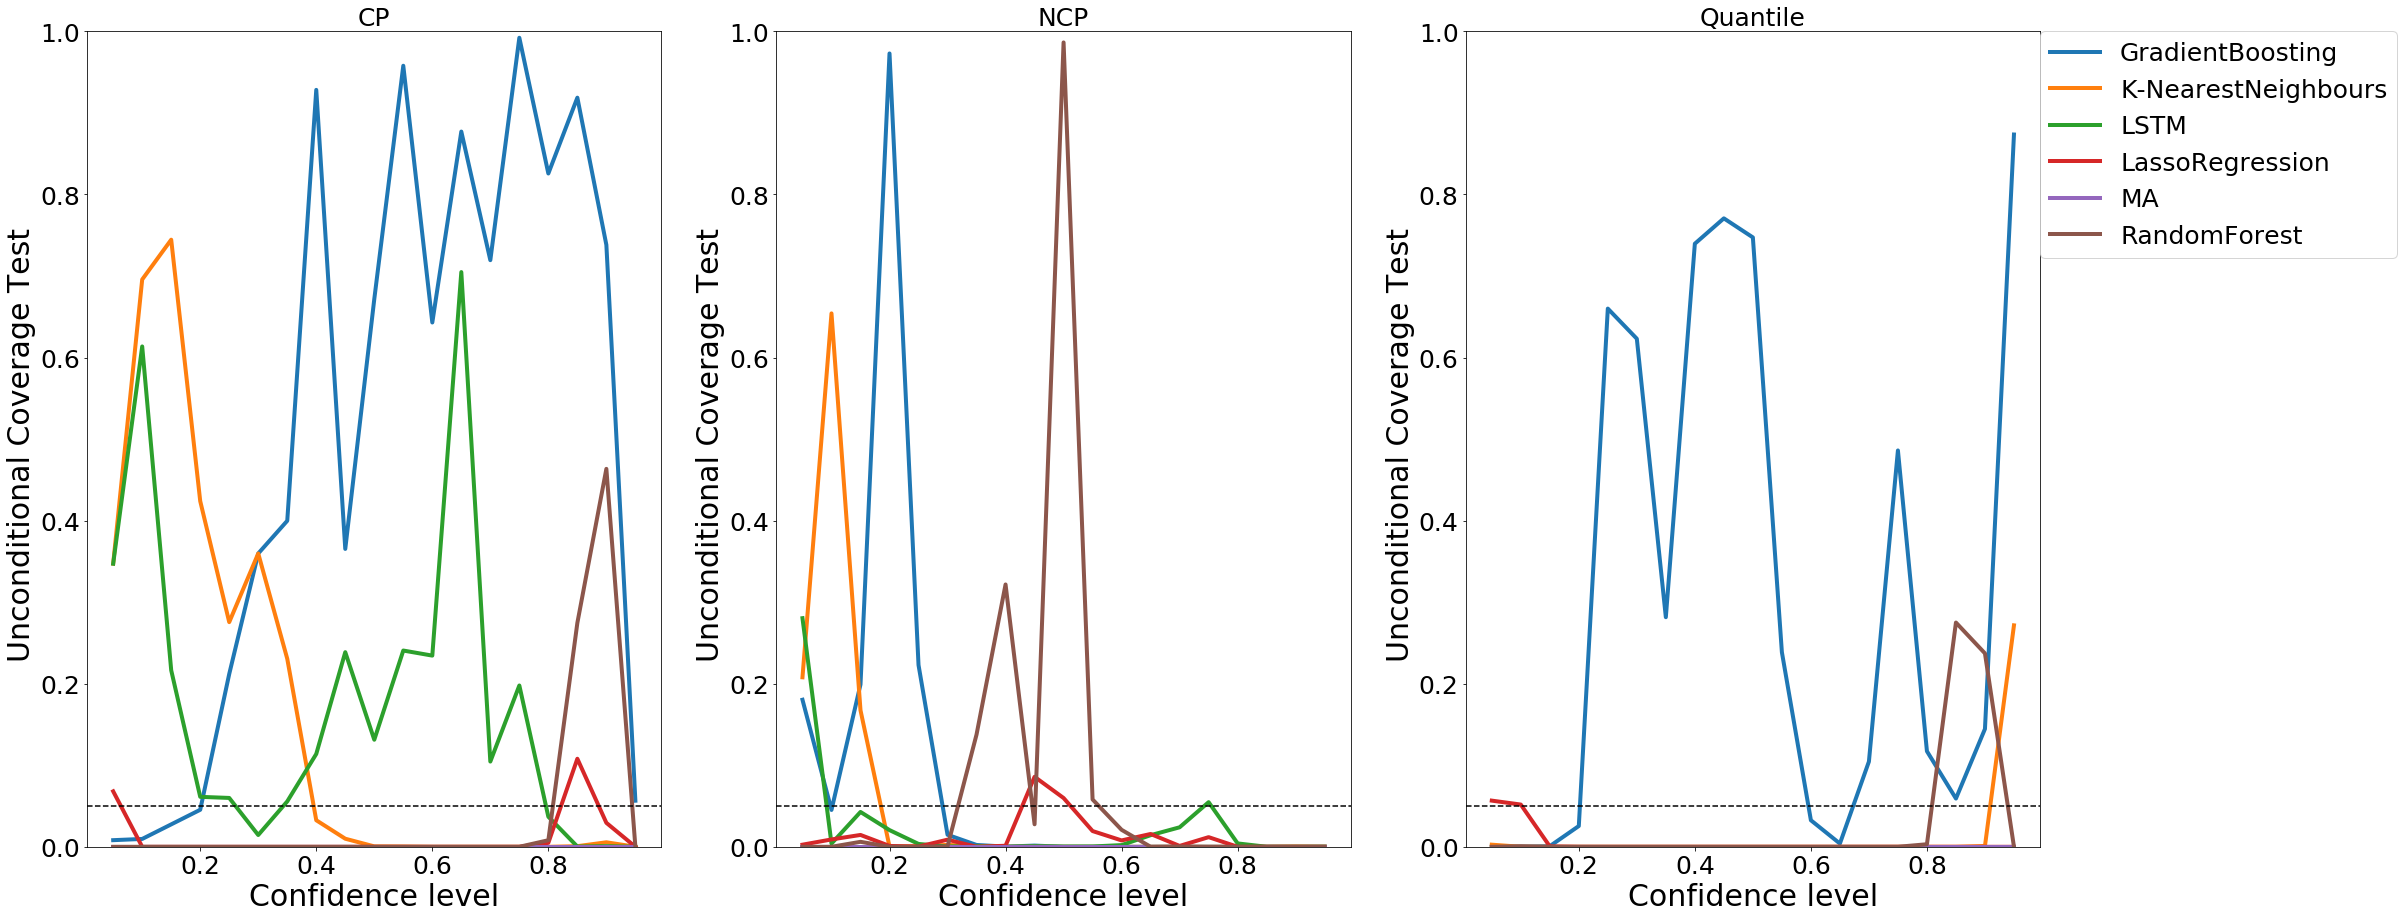

In [87]:
 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(35, 15))
for i , g in out3.groupby(['algo','type']):
    a,t=i
    print(a)
    if t=='CP': j=0
    if t=='NCP': j=1
    if t=='Quantile': j=2
    if a=='MA': 
        axes[0].plot(1-g.alpha/100,g.CU,label=a,linewidth=4)
        axes[1].plot(1-g.alpha/100,g.CU,label=a,linewidth=4)
        axes[2].plot(1-g.alpha/100,g.CU,label=a,linewidth=4)
    else:
    
        axes[j].plot(1-g.alpha/100,g.CU,label=a,linewidth=4)
        axes[j].set_title(t)

 
 
axes[0].set_ylim([0, 1])
axes[1].set_ylim([0, 1])
axes[2].set_ylim([0, 1])

axes[0].axhline(y=0.05, color='black', linestyle='--')
axes[1].axhline(y=0.05, color='black', linestyle='--')
axes[2].axhline(y=0.05, color='black', linestyle='--')
 

axes[0].set_xlabel("Confidence level")
axes[0].set_ylabel("Unconditional Coverage Test ")
axes[1].set_xlabel("Confidence level")
axes[1].set_ylabel("Unconditional Coverage Test ")
axes[2].set_xlabel("Confidence level")
axes[2].set_ylabel("Unconditional Coverage Test ")
    
plt.legend( bbox_to_anchor=(1,1), ncol=1,loc=2, borderaxespad=0.)

plt.legend( bbox_to_anchor=(1,1), ncol=1,loc=2, borderaxespad=0.)
plt.savefig( 'UC.png',bbox_inches="tight" ) 


In [311]:
out3

,winker_score,algo,CU,CI,CC,DQTL,DQTU,type,alpha
0,NaN,MA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,Benchmarks,5.0
0,NaN,LassoRegression,6.110692e-06,7.039729e-08,1.777045e-11,0.000013,0.000108,CP,5.0
0,NaN,LassoRegression,1.397460e-10,9.135578e-05,5.453415e-13,0.000009,0.007945,NCP,5.0
0,NaN,LassoRegression,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,Quantile,5.0
0,NaN,K-NearestNeighbours,5.783602e-05,0.000000e+00,0.000000e+00,0.000000,0.000000,CP,5.0
...,...,...,...,...,...,...,...,...,...
0,NaN,RandomForest,1.149107e-08,1.423833e-07,8.215650e-14,0.000000,0.000000,Quantile,95.0
0,NaN,GradientBoosting,8.127544e-03,5.788377e-03,6.687557e-04,0.000000,0.000000,CP,95.0
0,NaN,GradientBoosting,1.803373e-01,7.594607e-02,8.439765e-02,0.000000,0.000000,NCP,95.0
0,NaN,GradientBoosting,2.567003e-08,8.949335e-09,1.221245e-14,0.000000,0.000000,Quantile,95.0


In [68]:
out=[]
for a in np.linspace(0.05,.95,19):
    d={"min_samples_leaf": 5,'alpha_':a}
    out.append(d)
out

[{'alpha_': 0.05, 'min_samples_leaf': 5},
 {'alpha_': 0.1, 'min_samples_leaf': 5},
 {'alpha_': 0.15, 'min_samples_leaf': 5},
 {'alpha_': 0.2, 'min_samples_leaf': 5},
 {'alpha_': 0.25, 'min_samples_leaf': 5},
 {'alpha_': 0.3, 'min_samples_leaf': 5},
 {'alpha_': 0.35, 'min_samples_leaf': 5},
 {'alpha_': 0.39999999999999997, 'min_samples_leaf': 5},
 {'alpha_': 0.44999999999999996, 'min_samples_leaf': 5},
 {'alpha_': 0.49999999999999994, 'min_samples_leaf': 5},
 {'alpha_': 0.5499999999999999, 'min_samples_leaf': 5},
 {'alpha_': 0.6, 'min_samples_leaf': 5},
 {'alpha_': 0.65, 'min_samples_leaf': 5},
 {'alpha_': 0.7, 'min_samples_leaf': 5},
 {'alpha_': 0.75, 'min_samples_leaf': 5},
 {'alpha_': 0.7999999999999999, 'min_samples_leaf': 5},
 {'alpha_': 0.85, 'min_samples_leaf': 5},
 {'alpha_': 0.9, 'min_samples_leaf': 5},
 {'alpha_': 0.95, 'min_samples_leaf': 5}]

In [356]:
alpha=5
window =3480
dfQ = pd.read_csv('QuantileRegression' +'_benchmark_'+ str(int(alpha)) + '.csv')

actual = pd.Series(dfQ.NetPosUsd)
predicted = pd.Series(dfQ.prediction)
lowerQ = pd.Series(dfQ['benchmark_lower'].values)
upperQ = pd.Series(dfQ['benchmark_upper'].values)


dfCP = pd.read_csv( 'CP'+'_'+'LassoRegression'+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')


actual = pd.Series(dfCP.NetPosUsd)
predicted = pd.Series(dfCP.prediction)
lowerCP = pd.Series(dfCP['CP_lower'].values)
upperCP = pd.Series(dfCP['CP_upper'].values)

dfNCP = pd.read_csv( 'NCP'+'_'+'LassoRegression'+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')


actual = pd.Series(dfNCP.NetPosUsd)
predicted = pd.Series(dfNCP.prediction)
lowerNCP = pd.Series(dfNCP['NCP_lower'].values)
upperNCP = pd.Series(dfNCP['NCP_upper'].values)

df = pd.read_csv('MvgAvgalpha' + str(int(alpha)) + '.csv')
actual2 = pd.Series(df.NetPosUsd[-3480:].values)
predicted = pd.Series(df.m[-3480:].values)
lower = pd.Series(df.lower_benchmark[-3480:].values)
upper = pd.Series(df.upper_benchmark[-3480:].values)



In [353]:
import seaborn as sns
sns.set()
del sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
del plt
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.rcParams.update(plt.rcParamsDefault)

In [226]:

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 38
#plt.rcParams['axes.grid'] = True

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=38)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

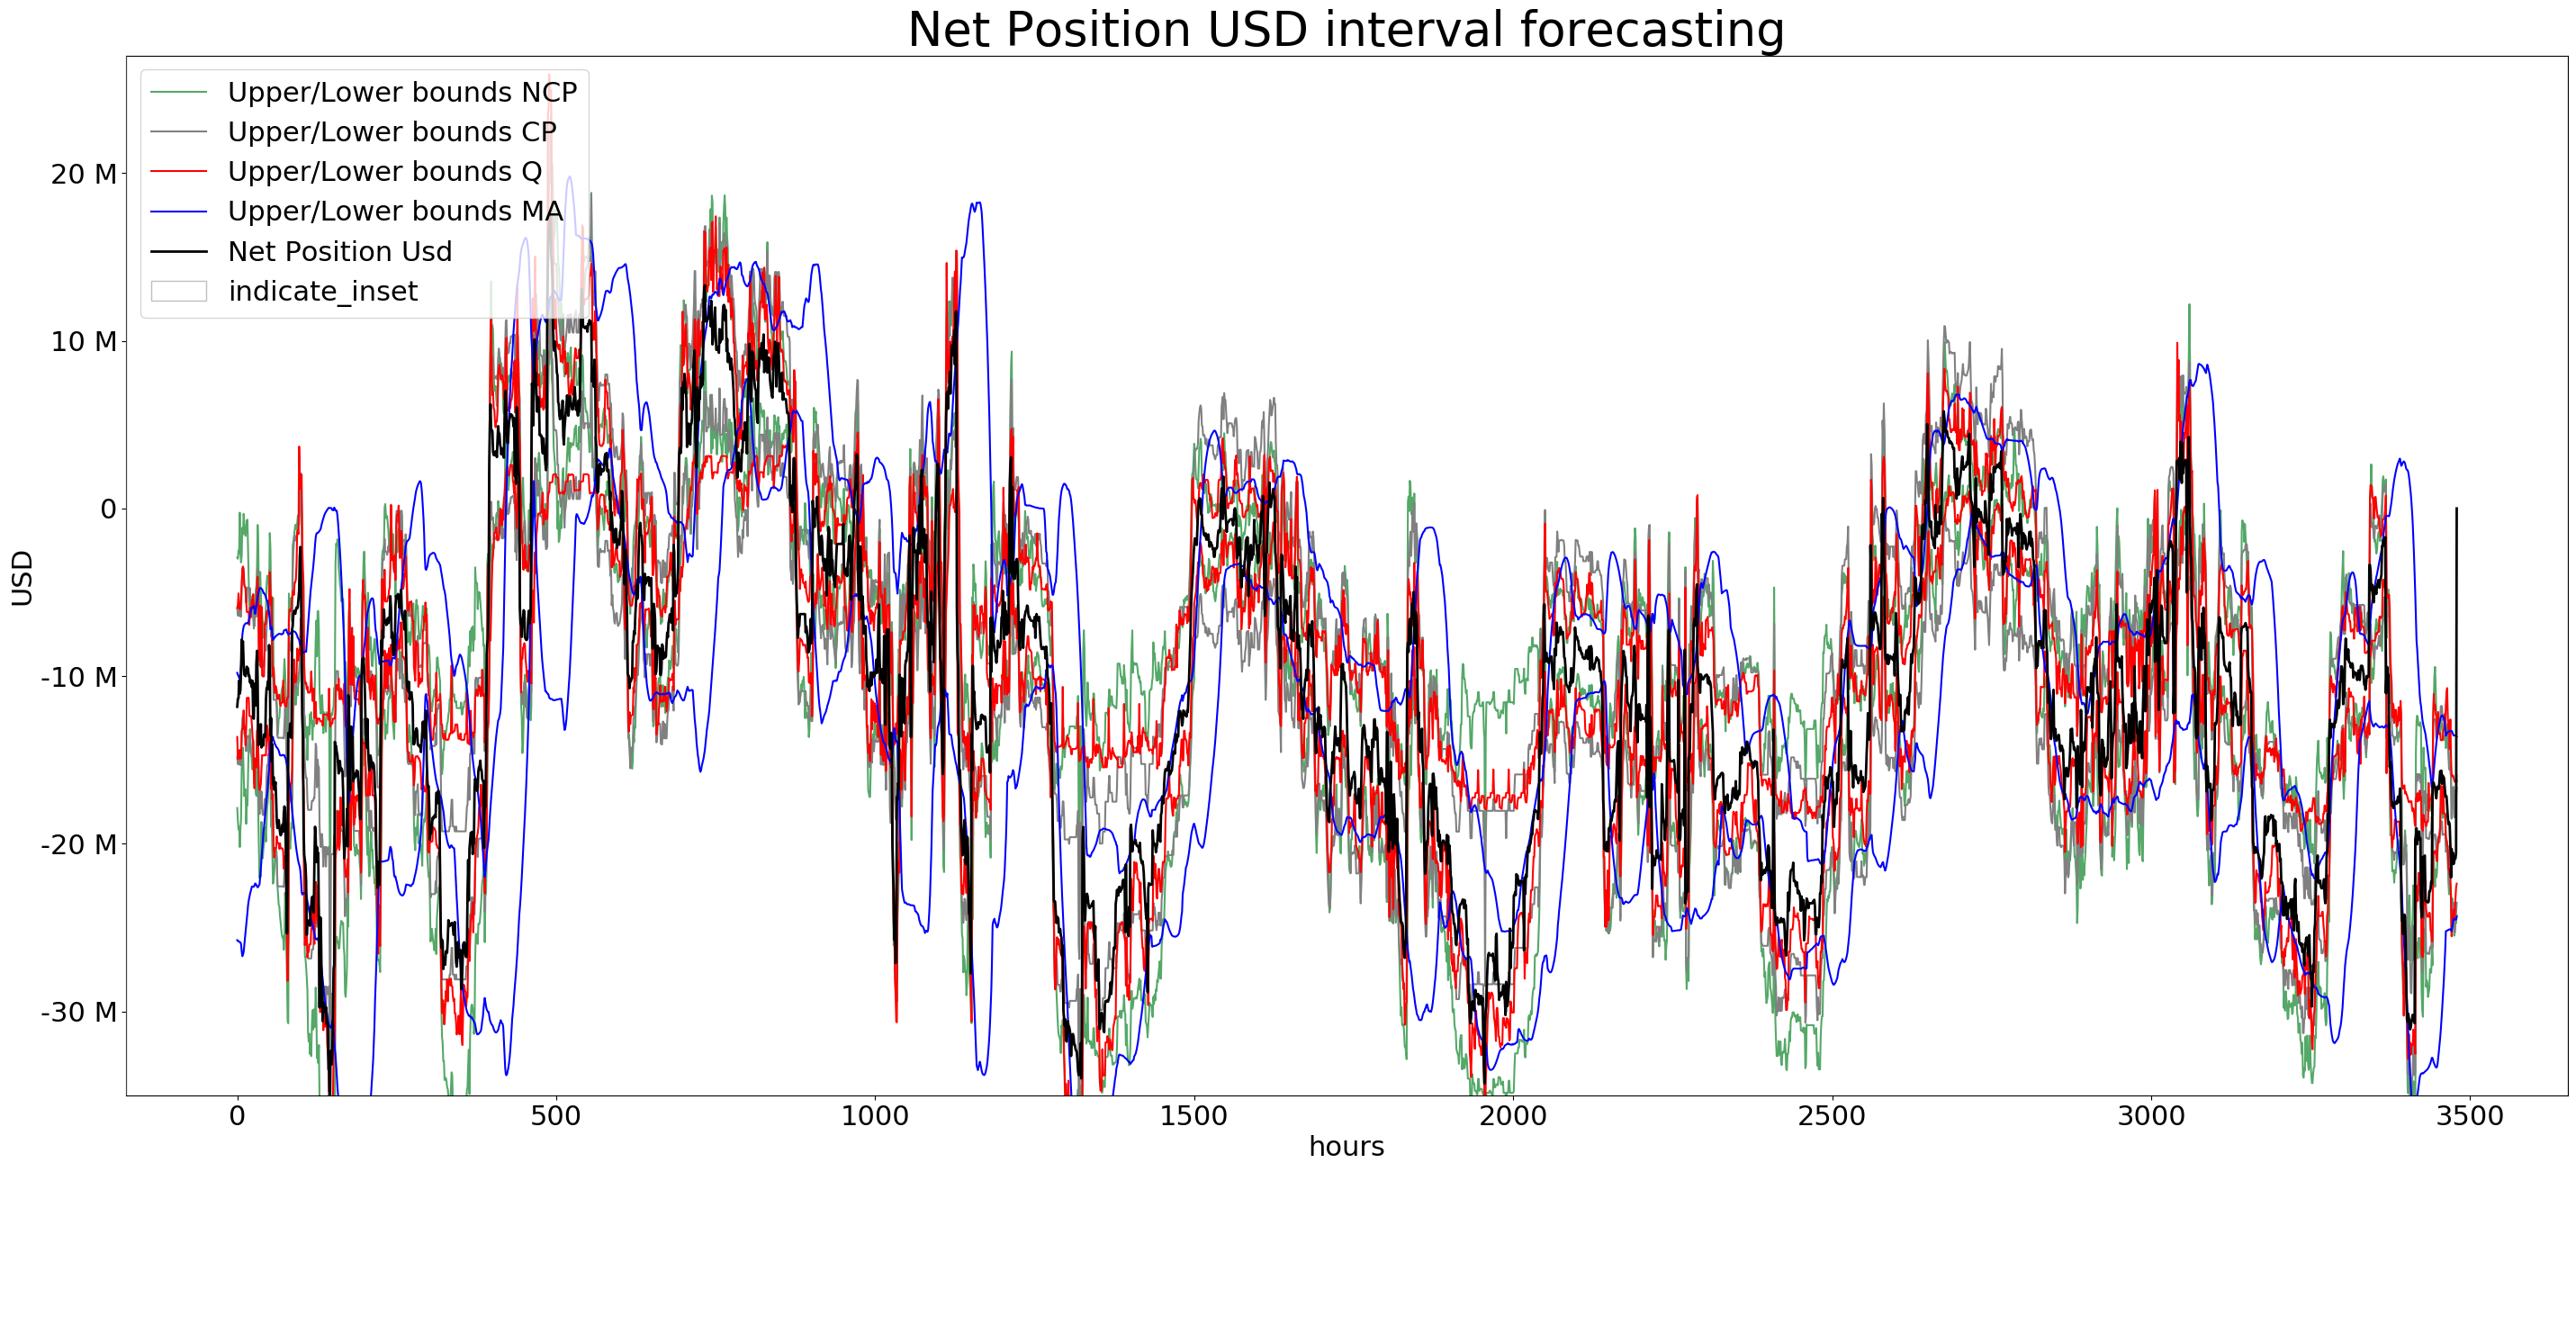

In [345]:
 
SMALL_SIZE = 22
MEDIUM_SIZE = 22
BIGGER_SIZE = 32
#plt.rcParams['axes.grid'] = True

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=38)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(35, 15))
axes.plot( lowerNCP ,'-g',label='Upper/Lower bounds NCP')
axes.plot( upperNCP ,'-g')
axes.plot( lowerCP ,'grey',label='Upper/Lower bounds CP ')
axes.plot( upperCP ,'grey')
axes.plot( upperQ ,'red',label='Upper/Lower bounds Q ')
axes.plot( lowerQ ,'red')
axes.plot( upper ,'blue',label='Upper/Lower bounds MA ')
axes.plot( lower ,'blue')
 
axes.plot(actual, color='black', label='Net Position Usd',linewidth=2)

axes.set_xlabel('hours')
axes.set_ylabel('USD')
axes.set_title('Net Position USD interval forecasting')
 
# sub region of the original image
x1, x2, y1, y2 = 330, 450, -35000000, 27000000
#axes.set_xlim(x1, x2)
 
axes.indicate_inset_zoom(axins)    
axes.set_ylim(y1 ,y2)   
axes.legend(loc='upper left')
axes.yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.savefig('GradientBoosting2.png')

  5%|████▎                                                                              | 1/19 [00:00<00:01,  9.07it/s]

LightGBM


  5%|████▎                                                                              | 1/19 [00:00<00:02,  8.70it/s]

LassoRegression


  5%|████▎                                                                              | 1/19 [00:00<00:02,  8.33it/s]

K-NearestNeighbours


  5%|████▎                                                                              | 1/19 [00:00<00:01,  9.08it/s]

RandomForest


 16%|█████████████                                                                      | 3/19 [00:00<00:00, 29.99it/s]

MA


 21%|█████████████████▍                                                                 | 4/19 [00:00<00:00, 39.94it/s]

QR


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 40.39it/s]


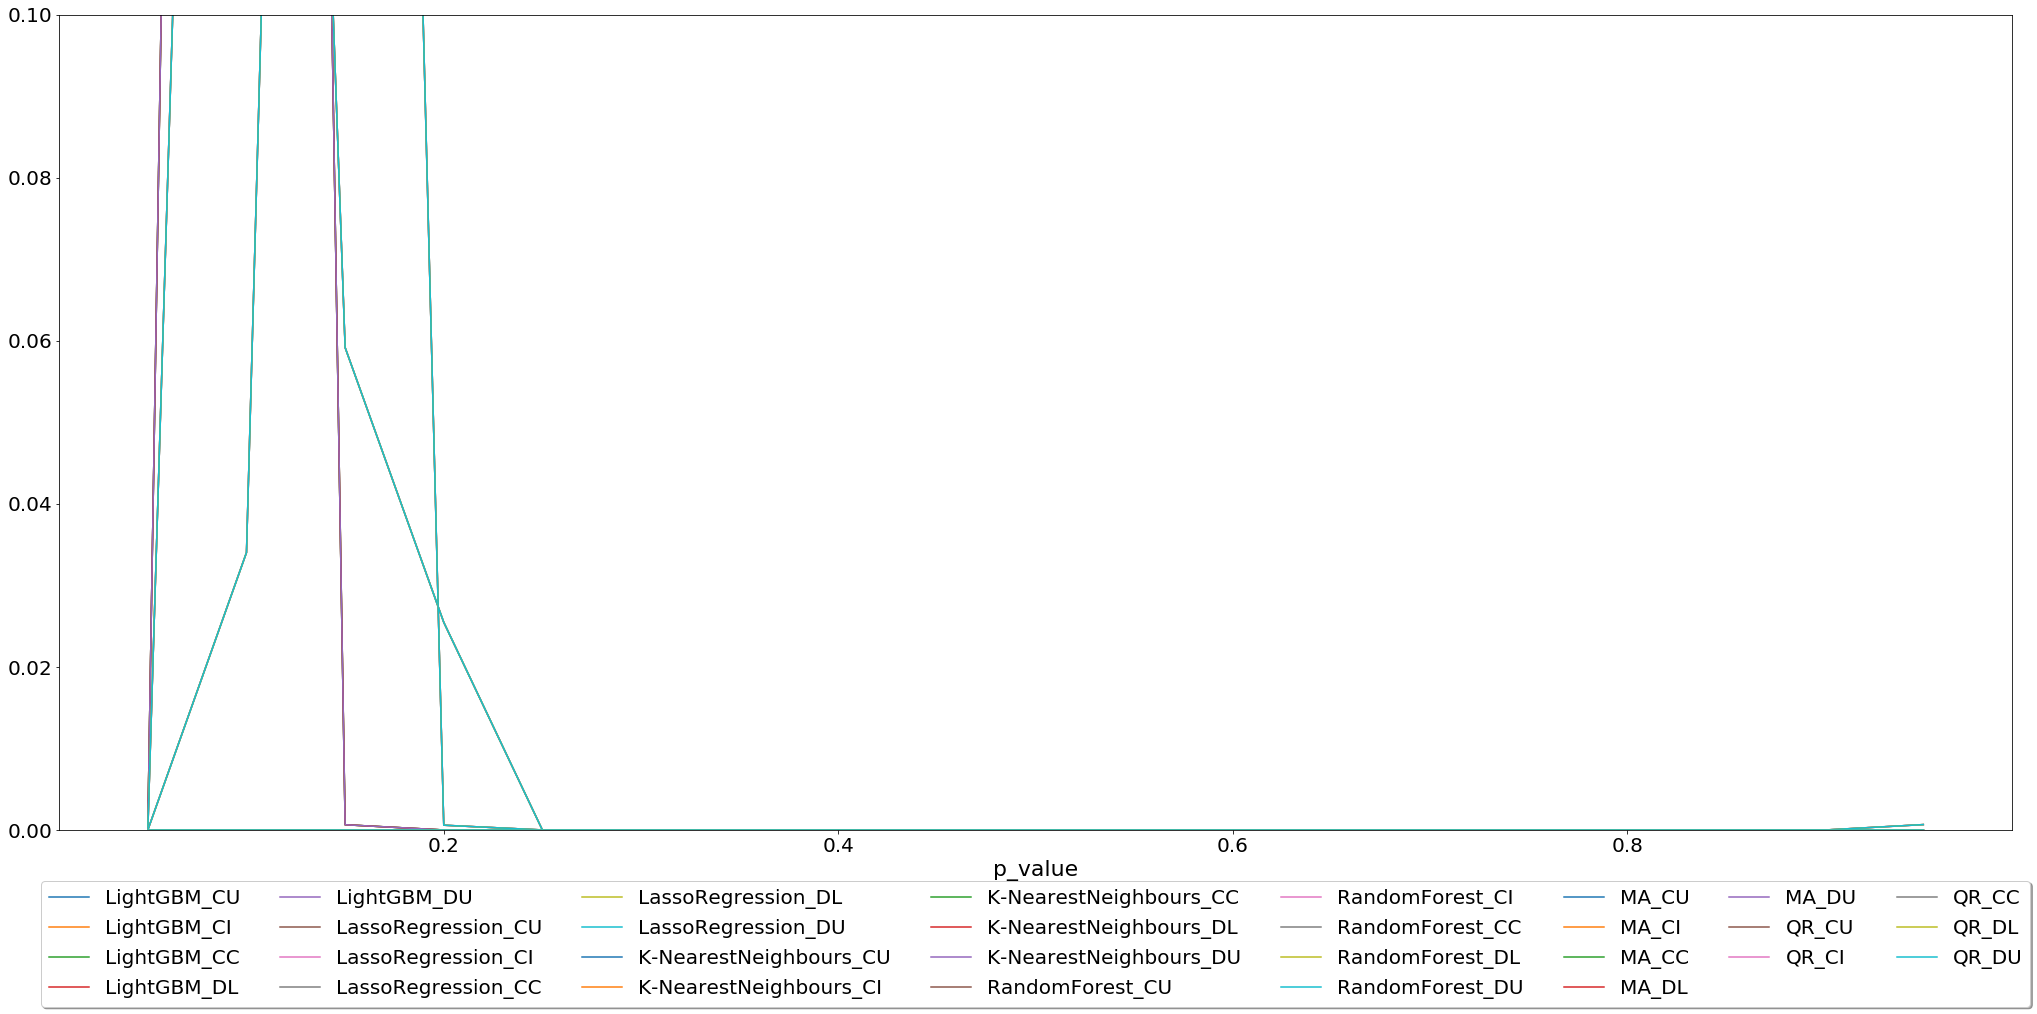

In [27]:
test=tests('CP')

test.set_index('p_value').plot(figsize=(35,15),ylim=(0,.1)).legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=8 ,markerscale=20)

In [243]:
out[out.alpha==95].sort_values('winker_score').to_latex()

'\\begin{tabular}{lrllr}\n\\toprule\n{} &  winker\\_score &                 algo &        type &  alpha \\\\\n\\midrule\n0 &  1.857731e+06 &      LassoRegression &    Quantile &   95.0 \\\\\n0 &  2.060294e+06 &     GradientBoosting &    Quantile &   95.0 \\\\\n0 &  2.065862e+06 &         RandomForest &    Quantile &   95.0 \\\\\n0 &  2.192638e+06 &      LassoRegression &         NCP &   95.0 \\\\\n0 &  2.192793e+06 &      LassoRegression &          CP &   95.0 \\\\\n0 &  2.245805e+06 &                 LSTM &    Quantile &   95.0 \\\\\n0 &  2.348819e+06 &         RandomForest &         NCP &   95.0 \\\\\n0 &  2.349711e+06 &         RandomForest &          CP &   95.0 \\\\\n0 &  2.850371e+06 &     GradientBoosting &         NCP &   95.0 \\\\\n0 &  2.851994e+06 &     GradientBoosting &          CP &   95.0 \\\\\n0 &  3.191110e+06 &                 LSTM &          CP &   95.0 \\\\\n0 &  3.203327e+06 &                 LSTM &         NCP &   95.0 \\\\\n0 &  6.554411e+06 &  K-NearestNeighbour

In [237]:
out2

,winker_score,algo,type,alpha
0,329378.912567,MA,Benchmarks,5.0
0,141559.803196,LassoRegression,CP,5.0
0,154032.366003,LassoRegression,NCP,5.0
0,197199.062655,LassoRegression,Quantile,5.0
0,351736.574105,K-NearestNeighbours,CP,5.0
...,...,...,...,...
0,676963.023667,GradientBoosting,NCP,95.0
0,492578.922597,GradientBoosting,Quantile,95.0
0,757888.572083,LSTM,CP,95.0
0,760790.143549,LSTM,NCP,95.0


In [238]:
out3

,winker_score,algo,CU,CI,CC,DQTL,DQTU,type,alpha
0,NaN,MA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,Benchmarks,5.0
0,NaN,LassoRegression,6.110692e-06,7.039729e-08,1.777045e-11,0.000013,0.000108,CP,5.0
0,NaN,LassoRegression,1.397460e-10,9.135578e-05,5.453415e-13,0.000009,0.007945,NCP,5.0
0,NaN,LassoRegression,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,Quantile,5.0
0,NaN,K-NearestNeighbours,5.783602e-05,0.000000e+00,0.000000e+00,0.000000,0.000000,CP,5.0
...,...,...,...,...,...,...,...,...,...
0,NaN,GradientBoosting,1.803373e-01,7.594607e-02,8.439765e-02,0.000000,0.000000,NCP,95.0
0,NaN,GradientBoosting,2.567003e-08,8.949335e-09,1.221245e-14,0.000000,0.000000,Quantile,95.0
0,NaN,LSTM,3.472263e-01,5.677261e-04,1.693009e-03,0.000000,0.000000,CP,95.0
0,NaN,LSTM,2.803775e-01,5.396589e-04,1.402750e-03,0.000000,0.000000,NCP,95.0


In [244]:


def tick_lossr(actual,lower,upper,alpha):
    def hit_series_lower(actual,lower):
        return ( (actual < lower ))* 1
    def hit_series_upper(actual ,upper):
        return ((actual > upper)  )* 1

    lossl = (alpha/2 - hit_series_lower(actual,lower)) * (actual - lower)
    lossu = (alpha/2 - hit_series_upper(actual,upper)) * (-actual + upper)
    loss=(lossl+lossu)/2

    return loss.mean()
def help_winkler(y,l,u,alpha):
    if ((l<=y)&(y<=u)):
        return u-l
    elif (y<l):
        return u-l +2/alpha*(l-y)
    else:
        return u-l +2/alpha*(y-u)
        
def winkler(y_test,pred_ql,pred_qh,alpha_cp):
    bounds_df = pd.DataFrame()

    # Using % confidence bounds
    bounds_df['lower_bound'] = pred_ql
    bounds_df['real_value'] = y_test
    bounds_df['upper_bound'] = pred_qh
    bounds_df['alpha']=alpha_cp
    
    bounds_df['winkler']=np.vectorize(help_winkler)(bounds_df['real_value'],bounds_df['lower_bound'], bounds_df['upper_bound'], bounds_df['alpha'])
    #plt.hist(np.log(bounds_df['winkler'][bounds_df['winkler']>0]) ,bins=25,label='Winkler',alpha=.5);
    #print("winklerwinkler_score points contained within " + str(1 - alpha_cp)+ "%  is the mean winklerwinkler_score:", bounds_df['winkler'].mean())
    return bounds_df['winkler']

    


def get_distributions_pinball(type_algo,alpha_,  window=3480):
    print(type_algo)
    cov = []
    mean = []
    std = []
    wklr = []

    pinball = []

    firm = []
    ChristofersenUnconditional = []
    ChristofersenIndependence = []
    ChristofersenConditional = []
    DynamicQuantileTestLower = []
    DynamicQuantileTestUpper = []
    Kupiectest = []
    
    out=pd.DataFrame() 
    for alpha in [alpha_]:
        
        if type_algo =='LassoRegression':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict['Coverage']= c_
            out_dict['Mean Coverage']= m_
            out_dict['Std Coverage']= s_
            out_dict['Winkler score']= w_
            out_dict['Pinball loss']= p_
          
            
            
            out_dict['CU']= cu_
            out_dict['CI']= ci_
            out_dict['CC']= cc_
            out_dict['DQTL']= dl_
            out_dict['DQTU']= du_
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict2['CU']= cu_
            out_dict2['CI']= ci_
            out_dict2['CC']= cc_
            out_dict2['DQTL']= dl_
            out_dict2['DQTU']= du_
            out_dict2['Coverage']= c_
            out_dict2['Mean Coverage']= m_
            out_dict2['Std Coverage']= s_
            out_dict2['Winkler score']= w_
            out_dict2['Pinball loss']= p_
            
            
            
             
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileRegression_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict3['CU']= cu_
            out_dict3['CI']= ci_
            out_dict3['CC']= cc_
            out_dict3['DQTL']= dl_
            out_dict3['DQTU']= du_
            out_dict3['Coverage']= c_
            out_dict3['Mean Coverage']= m_
            out_dict3['Std Coverage']= s_
            out_dict3['Winkler score']= w_
            out_dict3['Pinball loss']= p_
            
             
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
        elif type_algo =='K-NearestNeighbours':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict['CU']= cu_
            out_dict['CI']= ci_
            out_dict['CC']= cc_
            out_dict['DQTL']= dl_
            out_dict['DQTU']= du_
            out_dict['Coverage']= c_
            out_dict['Mean Coverage']= m_
            out_dict['Std Coverage']= s_
            out_dict['Winkler score']= w_
            out_dict['Pinball loss']= p_
             
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict2['CU']= cu_
            out_dict2['CI']= ci_
            out_dict2['CC']= cc_
            out_dict2['DQTL']= dl_
            out_dict2['DQTU']= du_
            out_dict2['Coverage']= c_
            out_dict2['Mean Coverage']= m_
            out_dict2['Std Coverage']= s_
            out_dict2['Winkler score']= w_
            out_dict2['Pinball loss']= p_
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileKNN_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict3['CU']= cu_
            out_dict3['CI']= ci_
            out_dict3['CC']= cc_
            out_dict3['DQTL']= dl_
            out_dict3['DQTU']= du_
            out_dict3['algo']= type_algo
            out_dict3['Coverage']= c_
            out_dict3['Mean Coverage']= m_
            out_dict3['Std Coverage']= s_
            out_dict3['Winkler score']= w_
            out_dict3['Pinball loss']= p_
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
            
        elif type_algo =='RandomForest':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict['CU']= cu_
            out_dict['CI']= ci_
            out_dict['CC']= cc_
            out_dict['DQTL']= dl_
            out_dict['DQTU']= du_
            out_dict['algo']= type_algo
            out_dict['Coverage']= c_
            out_dict['Mean Coverage']= m_
            out_dict['Std Coverage']= s_
            out_dict['Winkler score']= w_
            out_dict['Pinball loss']= p_
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict2['CU']= cu_
            out_dict2['CI']= ci_
            out_dict2['CC']= cc_
            out_dict2['DQTL']= dl_
            out_dict2['DQTU']= du_
            out_dict2['Coverage']= c_
            out_dict2['Mean Coverage']= m_
            out_dict2['Std Coverage']= s_
            out_dict2['Winkler score']= w_
            out_dict2['Pinball loss']= p_
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileForestRegression_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict3['CU']= cu_
            out_dict3['CI']= ci_
            out_dict3['CC']= cc_
            out_dict3['DQTL']= dl_
            out_dict3['DQTU']= du_
            out_dict3['Coverage']= c_
            out_dict3['Mean Coverage']= m_
            out_dict3['Std Coverage']= s_
            out_dict3['Winkler score']= w_
            out_dict3['Pinball loss']= p_
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
            
        elif type_algo =='GradientBoosting':
            
            df = pd.read_csv( 'CP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict['CU']= cu_
            out_dict['CI']= ci_
            out_dict['CC']= cc_
            out_dict['DQTL']= dl_
            out_dict['DQTU']= du_
            out_dict['Coverage']= c_
            out_dict['Mean Coverage']= m_
            out_dict['Std Coverage']= s_
            out_dict['Winkler score']= w_
            out_dict['Pinball loss']= p_
            out_dict['algo']= type_algo
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+type_algo+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict2['CU']= cu_
            out_dict2['CI']= ci_
            out_dict2['CC']= cc_
            out_dict2['DQTL']= dl_
            out_dict2['DQTU']= du_
            out_dict2['Coverage']= c_
            out_dict2['Mean Coverage']= m_
            out_dict2['Std Coverage']= s_
            out_dict2['Winkler score']= w_
            out_dict2['Pinball loss']= p_
            out_dict2['algo']= type_algo
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
            df = pd.read_csv('QuantileGradientBoosting_benchmark_' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.benchmark_lower)
            upper = pd.Series(df.benchmark_upper)
            out_dict3={}
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict3['CU']= cu_
            out_dict3['CI']= ci_
            out_dict3['CC']= cc_
            out_dict3['DQTL']= dl_
            out_dict3['DQTU']= du_
            out_dict3['Coverage']= c_
            out_dict3['Mean Coverage']= m_
            out_dict3['Std Coverage']= s_
            out_dict3['Winkler score']= w_
            out_dict3['Pinball loss']= p_
            out_dict3['algo']= type_algo
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            
            
            outdf=pd.concat([outdf,outdf2,outdf3])
            
         
        elif (type_algo=='MA') :
             
            df = pd.read_csv('MvgAvgalpha' + str(int(alpha)) + '.csv')
            actual = pd.Series(df.NetPosUsd[-3480:])
            predicted = pd.Series(df.m[-3480:])
            lower = pd.Series(df.lower_benchmark[-3480:])
            upper = pd.Series(df.upper_benchmark[-3480:])
            out_dict={}
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict['CU']= cu_
            out_dict['CI']= ci_
            out_dict['CC']= cc_
            out_dict['DQTL']= dl_
            out_dict['DQTU']= du_
            out_dict['Coverage']= c_
            out_dict['Mean Coverage']= m_
            out_dict['Std Coverage']= s_
            out_dict['Winkler score']= w_
            out_dict['Pinball loss']= p_
            out_dict['algo']= type_algo
            out_dict['type']= 'Benchmarks'
            
            outdf=pd.DataFrame(data=out_dict, index=[0])
        elif type_algo=='QR':
            
            
            df = pd.read_csv( 'CP'+'_'+'cudaLSTM'+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['CP_lower'])
            upper = pd.Series(df['CP_upper'])
            out_dict={}
            out_dict['type']= 'CP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict['CU']= cu_
            out_dict['CI']= ci_
            out_dict['CC']= cc_
            out_dict['DQTL']= dl_
            out_dict['DQTU']= du_
            out_dict['Coverage']= c_
            out_dict['Mean Coverage']= m_
            out_dict['Std Coverage']= s_
            out_dict['Winkler score']= w_
            out_dict['Pinball loss']= p_
            out_dict['algo']= 'LSTM'
            outdf=pd.DataFrame(data=out_dict, index=[0])
            
            df = pd.read_csv( 'NCP'+'_'+'cudaLSTM'+'_'+ str(int(alpha))+'_calibration'+'window' +str(window)+ '.csv')
             
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df['NCP_lower'])
            upper = pd.Series(df['NCP_upper'])
            out_dict2={}
            out_dict2['type']= 'NCP'
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict2['CU']= cu_
            out_dict2['CI']= ci_
            out_dict2['CC']= cc_
            out_dict2['DQTL']= dl_
            out_dict2['DQTU']= du_
            out_dict2['Coverage']= c_
            out_dict2['Mean Coverage']= m_
            out_dict2['Std Coverage']= s_
            out_dict2['Winkler score']= w_
            out_dict2['Pinball loss']= p_
            out_dict2['algo']= 'LSTM'
            outdf2=pd.DataFrame(data=out_dict2, index=[0])
            
           
             
            
            
            
            
            
             
            df = pd.read_csv('QuantileLstmBoundsBiLSTMCuda_alpha' + str(int(alpha))  + '.csv')
            actual = pd.Series(df.NetPosUsd)
            predicted = pd.Series(df.prediction)
            lower = pd.Series(df.QR_lower)
            upper = pd.Series(df.QR_upper)
            out_dict3={}
            Test = IntervalPredictionLMeasures(actual, predicted, lower, upper, alpha/100, type_algo)

            c_, m_, s_, w_, p_, f_, cu_, ci_, cc_, dl_, du_, k_ = Test.get_stats()
            out_dict3['CU']= cu_
            out_dict3['CI']= ci_
            out_dict3['CC']= cc_
            out_dict3['DQTL']= dl_
            out_dict3['DQTU']= du_
            out_dict3['Coverage']= c_
            out_dict3['Mean Coverage']= m_
            out_dict3['Std Coverage']= s_
            out_dict3['Winkler score']= w_
            out_dict3['Pinball loss']= p_
            out_dict3['algo']= 'LSTM'
            out_dict3['type']= 'Quantile'
            outdf3=pd.DataFrame(data=out_dict3, index=[0])
            outdf=pd.concat([outdf,outdf2,outdf3])
            
             
        
         

    return outdf
import seaborn as sns
def distplot(alpha ):
    out=pd.DataFrame(columns=['winker_score','algo'])
    algos=['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','MA','QR','OLDXGB']
    algos=['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','MA','QR','QCPQuantileRandomForest','QCPQuantileRegression','QCPQuantileLightGBM' ]
    algos=['LightGBM','LassoRegression','K-NearestNeighbours','RandomForest','GradientBoosting','MA','QR','QCPQuantileGradientBoosting',
                          'QCPQuantileRegression', 'QuantileRegression', 'QuantileGradientBoosting'  ]
    
    algos=[ 'MA','LassoRegression','K-NearestNeighbours','RandomForest','GradientBoosting','QR'  ]
    
    
    
    for i,x in enumerate(algos):
        df=get_distributions_pinball(x,alpha)
        out=pd.concat([out,df])
    out['alpha']    =alpha
    return out


out4=pd.DataFrame()
for x in tqdm(np.linspace(5,95,19)):
    add=distplot(x)
    out4=pd.concat([out4,add])

  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


  5%|████▎                                                                              | 1/19 [00:00<00:07,  2.35it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest


 11%|████████▋                                                                          | 2/19 [00:00<00:07,  2.34it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest


 16%|█████████████                                                                      | 3/19 [00:01<00:06,  2.35it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 21%|█████████████████▍                                                                 | 4/19 [00:01<00:06,  2.37it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 26%|█████████████████████▊                                                             | 5/19 [00:02<00:05,  2.36it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 32%|██████████████████████████▏                                                        | 6/19 [00:02<00:05,  2.35it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 37%|██████████████████████████████▌                                                    | 7/19 [00:02<00:05,  2.34it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest


 42%|██████████████████████████████████▉                                                | 8/19 [00:03<00:04,  2.33it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest


 47%|███████████████████████████████████████▎                                           | 9/19 [00:03<00:04,  2.35it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest


 53%|███████████████████████████████████████████▏                                      | 10/19 [00:04<00:03,  2.32it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest


 58%|███████████████████████████████████████████████▍                                  | 11/19 [00:04<00:03,  2.32it/s]

GradientBoosting
QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 63%|███████████████████████████████████████████████████▊                              | 12/19 [00:05<00:03,  2.28it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 68%|████████████████████████████████████████████████████████                          | 13/19 [00:05<00:02,  2.25it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 74%|████████████████████████████████████████████████████████████▍                     | 14/19 [00:06<00:02,  2.19it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 79%|████████████████████████████████████████████████████████████████▋                 | 15/19 [00:06<00:01,  2.22it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 84%|█████████████████████████████████████████████████████████████████████             | 16/19 [00:06<00:01,  2.24it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting


 89%|█████████████████████████████████████████████████████████████████████████▎        | 17/19 [00:07<00:00,  2.21it/s]

QR
MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 18/19 [00:07<00:00,  2.23it/s]

MA
LassoRegression
K-NearestNeighbours
RandomForest
GradientBoosting
QR

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:08<00:00,  2.27it/s]

In [286]:
pd.set_option('display.float_format', '{:.2E}'.format)
d=out4[out4.alpha==5]
d

,winker_score,algo,CU,CI,CC,DQTL,DQTU,Coverage,Mean Coverage,Std Coverage,Winkler score,Pinball loss,type,alpha
0,NaN,MA,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,8.39E-01,1.46E+07,7.66E+06,2.64E+07,3.29E+05,Benchmarks,5.00E+00
0,NaN,LassoRegression,6.11E-06,7.04E-08,1.78E-11,1.32E-05,1.08E-04,9.66E-01,8.20E+06,6.58E+05,1.13E+07,1.42E+05,CP,5.00E+00
0,NaN,LassoRegression,1.40E-10,9.14E-05,5.45E-13,9.28E-06,7.95E-03,9.72E-01,1.02E+07,3.94E+06,1.23E+07,1.54E+05,NCP,5.00E+00
0,NaN,LassoRegression,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,7.45E-01,2.30E+06,8.25E+05,1.58E+07,1.97E+05,Quantile,5.00E+00
0,NaN,K-NearestNeighbours,5.78E-05,0.00E+00,0.00E+00,0.00E+00,0.00E+00,9.34E-01,2.14E+07,3.47E+06,2.81E+07,3.52E+05,CP,5.00E+00
0,NaN,K-NearestNeighbours,1.20E-05,0.00E+00,0.00E+00,0.00E+00,0.00E+00,9.33E-01,2.43E+07,3.18E+06,3.07E+07,3.83E+05,NCP,5.00E+00
0,NaN,K-NearestNeighbours,2.72E-01,0.00E+00,0.00E+00,0.00E+00,0.00E+00,9.54E-01,1.60E+07,4.33E+06,1.93E+07,2.42E+05,Quantile,5.00E+00
0,NaN,RandomForest,1.29E-04,9.08E-12,5.20E-14,1.11E-15,2.46E-05,9.63E-01,8.72E+06,6.76E+05,1.21E+07,1.51E+05,CP,5.00E+00
0,NaN,RandomForest,1.40E-10,0.00E+00,0.00E+00,0.00E+00,0.00E+00,9.72E-01,1.83E+07,7.56E+06,1.96E+07,2.45E+05,NCP,5.00E+00
0,NaN,RandomForest,3.13E-05,1.23E-01,5.22E-05,3.82E-06,8.95E-03,9.34E-01,7.57E+06,4.20E+06,1.22E+07,1.52E+05,Quantile,5.00E+00


In [287]:
str((100*d.Coverage).astype(int).values)
d.Coverage =[str(int(np.round(100*x)))+'%' for x in d.Coverage]


C:\Users\actio\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [288]:
d.alpha=[str(int(x))+'%' for x in d.alpha]

C:\Users\actio\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [280]:
dd=d[['algo' ,'Coverage' ,	'Mean Coverage' ,	'Std Coverage' ,	'Winkler score' ,	'Pinball loss' ,	'type' ,	'alpha']].sort_values('Mean Coverage')
dd.to_latex('mytable.tex',index=False)

In [268]:
d[['algo' ,'Coverage' ,	'Mean Coverage' ,	'Std Coverage' ,	'Winkler score' ,	'Pinball loss' ,	'type' ,	'alpha']].sort_values('Mean Coverage')

,algo,Coverage,Mean Coverage,Std Coverage,Winkler score,Pinball loss,type,alpha
0,LassoRegression,74%,2.30E+06,8.25E+05,1.58E+07,1.97E+05,Quantile,5%
0,RandomForest,93%,7.57E+06,4.20E+06,1.22E+07,1.52E+05,Quantile,5%
0,GradientBoosting,94%,8.00E+06,3.45E+06,1.13E+07,1.41E+05,Quantile,5%
0,LassoRegression,96%,8.20E+06,6.58E+05,1.13E+07,1.42E+05,CP,5%
0,RandomForest,96%,8.72E+06,6.76E+05,1.21E+07,1.51E+05,CP,5%
0,LSTM,96%,8.89E+06,2.59E+06,1.19E+07,1.49E+05,CP,5%
0,LSTM,96%,9.12E+06,4.26E+06,1.18E+07,1.48E+05,Quantile,5%
0,GradientBoosting,94%,9.93E+06,1.27E+06,1.44E+07,1.80E+05,CP,5%
0,LassoRegression,97%,1.02E+07,3.94E+06,1.23E+07,1.54E+05,NCP,5%
0,GradientBoosting,96%,1.06E+07,5.22E+06,1.30E+07,1.63E+05,NCP,5%


In [269]:
d[['algo' ,'Coverage' ,	'Mean Coverage' ,	'Std Coverage' ,	'Winkler score' ,	'Pinball loss' ,	'type' ,	'alpha']].sort_values('Std Coverage')

,algo,Coverage,Mean Coverage,Std Coverage,Winkler score,Pinball loss,type,alpha
0,LassoRegression,96%,8.20E+06,6.58E+05,1.13E+07,1.42E+05,CP,5%
0,RandomForest,96%,8.72E+06,6.76E+05,1.21E+07,1.51E+05,CP,5%
0,LassoRegression,74%,2.30E+06,8.25E+05,1.58E+07,1.97E+05,Quantile,5%
0,GradientBoosting,94%,9.93E+06,1.27E+06,1.44E+07,1.80E+05,CP,5%
0,LSTM,96%,8.89E+06,2.59E+06,1.19E+07,1.49E+05,CP,5%
0,K-NearestNeighbours,93%,2.43E+07,3.18E+06,3.07E+07,3.83E+05,NCP,5%
0,GradientBoosting,94%,8.00E+06,3.45E+06,1.13E+07,1.41E+05,Quantile,5%
0,K-NearestNeighbours,93%,2.14E+07,3.47E+06,2.81E+07,3.52E+05,CP,5%
0,LassoRegression,97%,1.02E+07,3.94E+06,1.23E+07,1.54E+05,NCP,5%
0,RandomForest,93%,7.57E+06,4.20E+06,1.22E+07,1.52E+05,Quantile,5%


In [270]:
d[['algo' ,'Coverage' ,	'Mean Coverage' ,	'Std Coverage' ,	'Winkler score' ,	'Pinball loss' ,	'type' ,	'alpha']].sort_values('Pinball loss')

,algo,Coverage,Mean Coverage,Std Coverage,Winkler score,Pinball loss,type,alpha
0,GradientBoosting,94%,8.00E+06,3.45E+06,1.13E+07,1.41E+05,Quantile,5%
0,LassoRegression,96%,8.20E+06,6.58E+05,1.13E+07,1.42E+05,CP,5%
0,LSTM,96%,9.12E+06,4.26E+06,1.18E+07,1.48E+05,Quantile,5%
0,LSTM,96%,8.89E+06,2.59E+06,1.19E+07,1.49E+05,CP,5%
0,RandomForest,96%,8.72E+06,6.76E+05,1.21E+07,1.51E+05,CP,5%
0,RandomForest,93%,7.57E+06,4.20E+06,1.22E+07,1.52E+05,Quantile,5%
0,LassoRegression,97%,1.02E+07,3.94E+06,1.23E+07,1.54E+05,NCP,5%
0,GradientBoosting,96%,1.06E+07,5.22E+06,1.30E+07,1.63E+05,NCP,5%
0,GradientBoosting,94%,9.93E+06,1.27E+06,1.44E+07,1.80E+05,CP,5%
0,LSTM,96%,1.21E+07,7.39E+06,1.46E+07,1.83E+05,NCP,5%


In [271]:
d[['algo' ,'Coverage' ,	'Mean Coverage' ,	'Std Coverage' ,	'Winkler score' ,	'Pinball loss' ,	'type' ,	'alpha']].sort_values('Pinball loss')

,algo,Coverage,Mean Coverage,Std Coverage,Winkler score,Pinball loss,type,alpha
0,GradientBoosting,94%,8.00E+06,3.45E+06,1.13E+07,1.41E+05,Quantile,5%
0,LassoRegression,96%,8.20E+06,6.58E+05,1.13E+07,1.42E+05,CP,5%
0,LSTM,96%,9.12E+06,4.26E+06,1.18E+07,1.48E+05,Quantile,5%
0,LSTM,96%,8.89E+06,2.59E+06,1.19E+07,1.49E+05,CP,5%
0,RandomForest,96%,8.72E+06,6.76E+05,1.21E+07,1.51E+05,CP,5%
0,RandomForest,93%,7.57E+06,4.20E+06,1.22E+07,1.52E+05,Quantile,5%
0,LassoRegression,97%,1.02E+07,3.94E+06,1.23E+07,1.54E+05,NCP,5%
0,GradientBoosting,96%,1.06E+07,5.22E+06,1.30E+07,1.63E+05,NCP,5%
0,GradientBoosting,94%,9.93E+06,1.27E+06,1.44E+07,1.80E+05,CP,5%
0,LSTM,96%,1.21E+07,7.39E+06,1.46E+07,1.83E+05,NCP,5%


In [284]:
d

,winker_score,algo,CU,CI,CC,DQTL,DQTU,Coverage,Mean Coverage,Std Coverage,Winkler score,Pinball loss,type,alpha
0,NaN,MA,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,84%,1.46E+07,7.66E+06,2.64E+07,3.29E+05,Benchmarks,5%
0,NaN,LassoRegression,6.11E-06,7.04E-08,1.78E-11,1.32E-05,1.08E-04,97%,8.20E+06,6.58E+05,1.13E+07,1.42E+05,CP,5%
0,NaN,LassoRegression,1.40E-10,9.14E-05,5.45E-13,9.28E-06,7.95E-03,97%,1.02E+07,3.94E+06,1.23E+07,1.54E+05,NCP,5%
0,NaN,LassoRegression,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,74%,2.30E+06,8.25E+05,1.58E+07,1.97E+05,Quantile,5%
0,NaN,K-NearestNeighbours,5.78E-05,0.00E+00,0.00E+00,0.00E+00,0.00E+00,93%,2.14E+07,3.47E+06,2.81E+07,3.52E+05,CP,5%
0,NaN,K-NearestNeighbours,1.20E-05,0.00E+00,0.00E+00,0.00E+00,0.00E+00,93%,2.43E+07,3.18E+06,3.07E+07,3.83E+05,NCP,5%
0,NaN,K-NearestNeighbours,2.72E-01,0.00E+00,0.00E+00,0.00E+00,0.00E+00,95%,1.60E+07,4.33E+06,1.93E+07,2.42E+05,Quantile,5%
0,NaN,RandomForest,1.29E-04,9.08E-12,5.20E-14,1.11E-15,2.46E-05,96%,8.72E+06,6.76E+05,1.21E+07,1.51E+05,CP,5%
0,NaN,RandomForest,1.40E-10,0.00E+00,0.00E+00,0.00E+00,0.00E+00,97%,1.83E+07,7.56E+06,1.96E+07,2.45E+05,NCP,5%
0,NaN,RandomForest,3.13E-05,1.23E-01,5.22E-05,3.82E-06,8.95E-03,93%,7.57E+06,4.20E+06,1.22E+07,1.52E+05,Quantile,5%


In [307]:
out4['CU_']=(out4.CU>=.05)*1
out4['CI_']=(out4.CI>=.05)*1
out4['CC_']=(out4.CC>=.05)*1
out4

,winker_score,algo,CU,CI,CC,DQTL,DQTU,Coverage,Mean Coverage,Std Coverage,Winkler score,Pinball loss,type,alpha,CU_,CI_,CC_
0,NaN,MA,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,8.39E-01,1.46E+07,7.66E+06,2.64E+07,3.29E+05,Benchmarks,5.00E+00,0,0,0
0,NaN,LassoRegression,6.11E-06,7.04E-08,1.78E-11,1.32E-05,1.08E-04,9.66E-01,8.20E+06,6.58E+05,1.13E+07,1.42E+05,CP,5.00E+00,0,0,0
0,NaN,LassoRegression,1.40E-10,9.14E-05,5.45E-13,9.28E-06,7.95E-03,9.72E-01,1.02E+07,3.94E+06,1.23E+07,1.54E+05,NCP,5.00E+00,0,0,0
0,NaN,LassoRegression,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,7.45E-01,2.30E+06,8.25E+05,1.58E+07,1.97E+05,Quantile,5.00E+00,0,0,0
0,NaN,K-NearestNeighbours,5.78E-05,0.00E+00,0.00E+00,0.00E+00,0.00E+00,9.34E-01,2.14E+07,3.47E+06,2.81E+07,3.52E+05,CP,5.00E+00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,GradientBoosting,1.80E-01,7.59E-02,8.44E-02,0.00E+00,0.00E+00,4.51E-02,1.58E+05,8.04E+04,2.85E+06,6.77E+05,NCP,9.50E+01,1,1,1
0,NaN,GradientBoosting,2.57E-08,8.95E-09,1.22E-14,0.00E+00,0.00E+00,7.18E-02,8.59E+04,3.09E+05,2.06E+06,4.93E+05,Quantile,9.50E+01,0,0,0
0,NaN,LSTM,3.47E-01,5.68E-04,1.69E-03,0.00E+00,0.00E+00,4.66E-02,1.81E+05,8.44E+04,3.19E+06,7.58E+05,CP,9.50E+01,1,0,0
0,NaN,LSTM,2.80E-01,5.40E-04,1.40E-03,0.00E+00,0.00E+00,5.40E-02,2.57E+05,1.98E+05,3.20E+06,7.61E+05,NCP,9.50E+01,1,0,0


In [315]:
out4['diff']=out4.Coverage-out4.alpha/100

In [309]:
new=out4.groupby(['algo','type'])['CU_','CI_','CC_'].mean().reset_index()
new.CU_=[str(int(np.round(100*x)))+'%' for x in new.CU_]
new.CI_=[str(int(np.round(100*x)))+'%' for x in new.CI_]
new.CC_=[str(int(np.round(100*x)))+'%' for x in new.CC_]
new.to_latex('test.tex',index=False)

C:\Users\actio\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [316]:
out4.groupby(['algo','type'])['CU_','CI_','CC_','diff'].mean().reset_index()

C:\Users\actio\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,algo,type,CU_,CI_,CC_,diff
0,GradientBoosting,CP,7.89E-01,0.00E+00,0.00E+00,-5.07E-03
1,GradientBoosting,NCP,2.11E-01,5.26E-02,5.26E-02,2.21E-02
2,GradientBoosting,Quantile,6.84E-01,0.00E+00,0.00E+00,7.09E-03
3,K-NearestNeighbours,CP,3.68E-01,0.00E+00,0.00E+00,-2.04E-02
4,K-NearestNeighbours,NCP,1.58E-01,0.00E+00,0.00E+00,-3.11E-02
5,K-NearestNeighbours,Quantile,5.26E-02,0.00E+00,0.00E+00,4.03E-02
6,LSTM,CP,7.37E-01,0.00E+00,0.00E+00,-2.04E-03
7,LSTM,NCP,1.05E-01,0.00E+00,0.00E+00,2.12E-02
8,LSTM,Quantile,0.00E+00,1.05E-01,0.00E+00,9.97E-02
9,LassoRegression,CP,1.05E-01,0.00E+00,0.00E+00,-4.39E-02


In [317]:
out4

,winker_score,algo,CU,CI,CC,DQTL,DQTU,Coverage,Mean Coverage,Std Coverage,Winkler score,Pinball loss,type,alpha,CU_,CI_,CC_,diff
0,NaN,MA,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,8.39E-01,1.46E+07,7.66E+06,2.64E+07,3.29E+05,Benchmarks,5.00E+00,0,0,0,7.89E-01
0,NaN,LassoRegression,6.11E-06,7.04E-08,1.78E-11,1.32E-05,1.08E-04,9.66E-01,8.20E+06,6.58E+05,1.13E+07,1.42E+05,CP,5.00E+00,0,0,0,9.16E-01
0,NaN,LassoRegression,1.40E-10,9.14E-05,5.45E-13,9.28E-06,7.95E-03,9.72E-01,1.02E+07,3.94E+06,1.23E+07,1.54E+05,NCP,5.00E+00,0,0,0,9.22E-01
0,NaN,LassoRegression,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,7.45E-01,2.30E+06,8.25E+05,1.58E+07,1.97E+05,Quantile,5.00E+00,0,0,0,6.95E-01
0,NaN,K-NearestNeighbours,5.78E-05,0.00E+00,0.00E+00,0.00E+00,0.00E+00,9.34E-01,2.14E+07,3.47E+06,2.81E+07,3.52E+05,CP,5.00E+00,0,0,0,8.84E-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,GradientBoosting,1.80E-01,7.59E-02,8.44E-02,0.00E+00,0.00E+00,4.51E-02,1.58E+05,8.04E+04,2.85E+06,6.77E+05,NCP,9.50E+01,1,1,1,-9.05E-01
0,NaN,GradientBoosting,2.57E-08,8.95E-09,1.22E-14,0.00E+00,0.00E+00,7.18E-02,8.59E+04,3.09E+05,2.06E+06,4.93E+05,Quantile,9.50E+01,0,0,0,-8.78E-01
0,NaN,LSTM,3.47E-01,5.68E-04,1.69E-03,0.00E+00,0.00E+00,4.66E-02,1.81E+05,8.44E+04,3.19E+06,7.58E+05,CP,9.50E+01,1,0,0,-9.03E-01
0,NaN,LSTM,2.80E-01,5.40E-04,1.40E-03,0.00E+00,0.00E+00,5.40E-02,2.57E+05,1.98E+05,3.20E+06,7.61E+05,NCP,9.50E+01,1,0,0,-8.96E-01


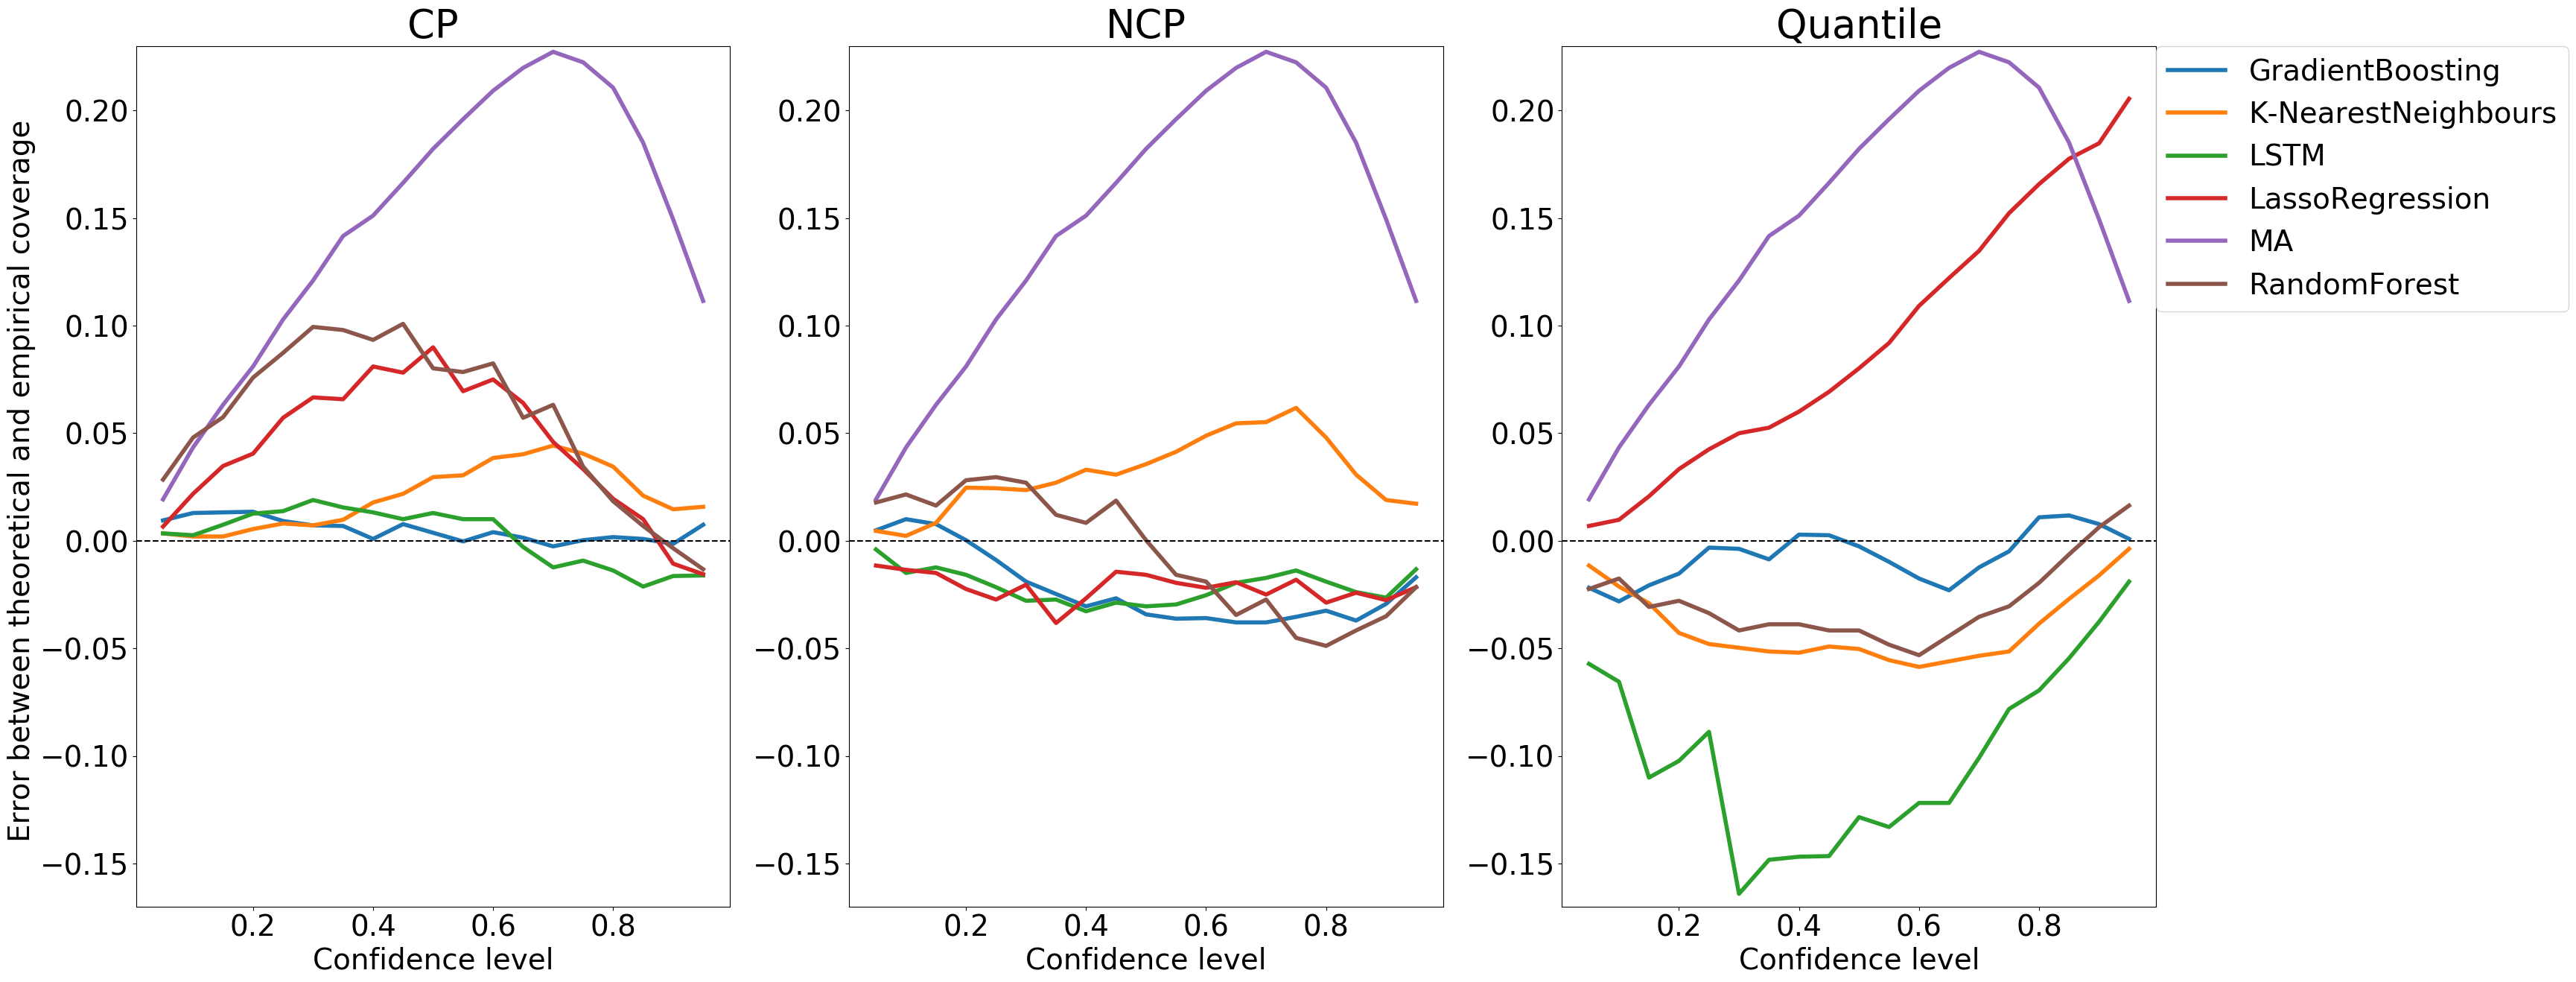

In [348]:

SMALL_SIZE = 28
MEDIUM_SIZE = 28
BIGGER_SIZE = 38
#plt.rcParams['axes.grid'] = True

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=38)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(35, 15))
for i , g in out4.groupby(['algo','type']):
    a,t=i
    #print(a)
    #print(g[['Coverage','alpha']])
    if t=='CP': j=0
    if t=='NCP': j=1
    if t=='Quantile': j=2
    if a=='MA': 
        axes[0].plot(1-g.alpha/100,1-g.alpha/100-(g.Coverage),label=a,linewidth=4)
        axes[1].plot(1-g.alpha/100,1-g.alpha/100-(g.Coverage),label=a,linewidth=4)
        axes[2].plot(1-g.alpha/100,1-g.alpha/100-(g.Coverage),label=a,linewidth=4)
    else:
    
        axes[j].plot(1-g.alpha/100,1-g.alpha/100-(g.Coverage),label=a,linewidth=4)
        axes[j].set_title(t)

 
 
axes[0].set_ylim([-.17, .23])
axes[1].set_ylim([-.17, .23])
axes[2].set_ylim([-.17, .23])


axes[0].set_xlabel("Confidence level")
axes[0].set_ylabel("Error between theoretical and empirical coverage ")
axes[1].set_xlabel("Confidence level")
 
axes[2].set_xlabel("Confidence level")
axes[0].axhline(y=0., color='black', linestyle='--')
axes[1].axhline(y=0., color='black', linestyle='--')
axes[2].axhline(y=0., color='black', linestyle='--')
 
    
plt.legend( bbox_to_anchor=(1,1), ncol=1,loc=2, borderaxespad=0.)

plt.legend( bbox_to_anchor=(1,1), ncol=1,loc=2, borderaxespad=0.)
plt.savefig( 'differencecover.png',bbox_inches="tight" ) 


colnames=['QCP_lower', 'QCP_upper', 'NetPosUsd', 'prediction'] 
for x in tqdm(np.linspace(5,95,19)):
    d = pd.read_csv('NCP_cudaLSTM_'+str(int(x))+'_calibrationwindow3480.csv' ) 
    d2= pd.read_csv('CP_GradientBoosting_5_calibrationwindow48.csv')
    d['NetPosUsd']= d2['NetPosUsd']
    d.to_csv('NCP_cudaLSTM_'+str(int(x))+'_calibrationwindow3480.csv',index=False)